# 程式碼

## 套件

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

## 下載資料

### 「地區年齡性別統計表-嚴重特殊傳染性肺炎(112/3/19以前病例定義版本)-依發病日統計(以日為單位)」

In [ ]:
#從網站下載的作法
import time
url_1='https://od.cdc.gov.tw/eic/Age_County_Gender_day_19Cov.csv'
start = time.time() #紀錄下載要花多久時間
covid_df1=pd.read_csv(url_1, encoding='utf8', parse_dates=[1])
end = time.time()
print(end - start)

In [ ]:
#檔案已下載工作目錄
#parse_dates = 1:日期資料的欄位在第2欄
covid_df1 = pd.read_csv('Age_County_Gender_day_19Cov.csv', encoding='utf8', parse_dates=[1])

In [ ]:
covid_df1.head()

,確定病名,發病日,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-11,空值,空值,F,是,55-59,1
1,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-23,空值,空值,F,是,50-54,1
2,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-26,彰化縣,和美鎮,M,否,50-54,1
3,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-27,南投縣,南投市,F,否,40-44,1
4,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-28,空值,空值,F,是,50-54,1


In [ ]:
covid_df1.shape

(2209746, 8)

### 「地區年齡性別統計表-嚴重特殊傳染性肺炎-依發病日統計(以日為單位)」

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url_2='https://od.cdc.gov.tw/eic/Age_County_Gender_day_19CVS.csv'
covid_df2=pd.read_csv(url_2, encoding='utf8', parse_dates=[1])
covid_df2.head()

,確定病名,發病日,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎,2023-01-26,新北市,瑞芳區,M,否,70+,1
1,嚴重特殊傳染性肺炎,2023-02-20,新竹縣,湖口鄉,M,否,70+,1
2,嚴重特殊傳染性肺炎,2023-02-24,新北市,新店區,M,否,70+,1
3,嚴重特殊傳染性肺炎,2023-02-25,新北市,中和區,F,否,70+,1
4,嚴重特殊傳染性肺炎,2023-03-01,新北市,汐止區,M,否,50-54,1


In [ ]:
covid_df2.shape

(32410, 8)

## 資料前處理

In [ ]:
#比較欄位名稱是否相同
covid_df1.columns == covid_df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

### 合併DataFrame

In [ ]:
#ignore_index=True，index重編
covid_df = pd.concat([covid_df1, covid_df2], ignore_index=True)

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242156 entries, 0 to 2242155
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   確定病名     object        
 1   發病日      datetime64[ns]
 2   縣市       object        
 3   鄉鎮       object        
 4   性別       object        
 5   是否為境外移入  object        
 6   年齡層      object        
 7   確定病例數    int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 136.9+ MB


In [ ]:
#檢查資料數是否相等
covid_df1.shape[0] + covid_df2.shape[0] == covid_df.shape[0]

True

### 判斷是否有遺失值

In [ ]:
covid_df.isna().values.any()

False

### 檢視各變數資料型別

In [ ]:
covid_df.dtypes

確定病名               object
發病日        datetime64[ns]
縣市                 object
鄉鎮                 object
性別                 object
是否為境外移入            object
年齡層                object
確定病例數               int64
dtype: object

### 探索object型別各變數可能值

In [ ]:
#只選object型別的資料看有多少類
(covid_df.select_dtypes(include='object')
         .apply(set))

確定病名                {嚴重特殊傳染性肺炎(112/3/19以前病例定義版本), 嚴重特殊傳染性肺炎}
縣市         {嘉義市, 彰化縣, 花蓮縣, 新竹縣, 屏東縣, 金門縣, 連江縣, 高雄市, 台中市, ...
鄉鎮         {莿桐鄉, 前鎮區, 鹽埕區, 和平區, 松山區, 鹿野鄉, 莒光鄉, 牡丹鄉, 大里區, ...
性別                                              {U, F, X, M}
是否為境外移入                                               {否, 是}
年齡層        {0, 40-44, 50-54, 3, 15-19, 65-69, 5-9, 55-59,...
dtype: object

In [ ]:
#各類別有幾個
(covid_df.select_dtypes(include='object')
         .apply(set)
         .apply(len))

確定病名         2
縣市          23
鄉鎮         359
性別           4
是否為境外移入      2
年齡層         19
dtype: int64

### 縣市中有「空值」

In [ ]:
covid_df.縣市.unique()

array(['空值', '彰化縣', '南投縣', '新北市', '桃園市', '台南市', '台中市', '台北市', '新竹市',
       '基隆市', '新竹縣', '宜蘭縣', '高雄市', '雲林縣', '屏東縣', '苗栗縣', '嘉義縣', '花蓮縣',
       '台東縣', '嘉義市', '澎湖縣', '連江縣', '金門縣'], dtype=object)

In [ ]:
covid_df.縣市.value_counts()

縣市
台中市    252172
高雄市    248391
新北市    234078
台南市    214440
彰化縣    166889
台北市    136867
桃園市    135997
屏東縣    124547
雲林縣     99235
苗栗縣     85024
嘉義縣     78622
宜蘭縣     76594
新竹縣     73554
南投縣     64470
基隆市     59260
花蓮縣     54653
台東縣     35809
新竹市     32849
嘉義市     20336
金門縣     18260
澎湖縣     13990
空值      12796
連江縣      3323
Name: count, dtype: int64

In [ ]:
#把縣市是空值的抓出來看一下
covid_df[covid_df['縣市'] == '空值']

,確定病名,發病日,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-11,空值,空值,F,是,55-59,1
1,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-23,空值,空值,F,是,50-54,1
4,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-01-28,空值,空值,F,是,50-54,1
6,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-02-01,空值,空值,F,是,25-29,1
7,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020-02-01,空值,空值,F,是,45-49,1
...,...,...,...,...,...,...,...,...
2241003,嚴重特殊傳染性肺炎,2024-04-26,空值,空值,M,是,70+,1
2241354,嚴重特殊傳染性肺炎,2024-05-15,空值,空值,F,是,60-64,1
2241611,嚴重特殊傳染性肺炎,2024-05-21,空值,空值,F,是,30-34,1
2241858,嚴重特殊傳染性肺炎,2024-05-22,空值,空值,M,是,65-69,1


### 鄉鎮中有「空值」、「其他」

In [ ]:
covid_df.鄉鎮.unique()

array(['空值', '和美鎮', '南投市', '新莊區', '新店區', '龜山區', '桃園區', '中和區', '蘆竹區',
       '新市區', '林口區', '彰化市', '太平區', '北屯區', '三重區', '汐止區', '北區', '內湖區', '東區',
       '大里區', '中壢區', '大同區', '五股區', '信義區', '大安區', '仁愛區', '淡水區', '文山區',
       '八德區', '平鎮區', '萬華區', '中正區', '永和區', '蘆洲區', '大園區', '中山區', '松山區',
       '暖暖區', '板橋區', '竹北市', '土城區', '羅東鎮', '樹林區', '北投區', '冬山鄉', '三峽區',
       '溪湖鎮', '南港區', '安樂區', '士林區', '大寮區', '五結鄉', '石碇區', '田中鎮', '福興鄉',
       '頭城鎮', '礁溪鄉', '龍潭區', '萬里區', '泰山區', '溪州鄉', '豐原區', '蘇澳鎮', '八里區',
       '宜蘭市', '林內鄉', '深坑區', '埔心鄉', '龍井區', '鹽埔鄉', '小港區', '七堵區', '金山區',
       '永靖鄉', '霧峰區', '鶯歌區', '壯圍鄉', '草屯鎮', '楊梅區', '鼓山區', '新營區', '後龍鎮',
       '花壇鄉', '西屯區', '前金區', '新豐鄉', '員林市', '潭子區', '大溪區', '潮州鎮', '左營區',
       '新興區', '大林鎮', '屏東市', '鹿港鎮', '埔里鎮', '沙鹿區', '新屋區', '鳳山區', '三民區',
       '元長鄉', '花蓮市', '三芝區', '芳苑鄉', '瑞芳區', '芬園鄉', '卑南鄉', '觀音區', '大村鄉',
       '清水區', '埤頭鄉', '金峰鄉', '員山鄉', '吉安鄉', '麥寮鄉', '大雅區', '秀水鄉', '萬巒鄉',
       '竹田鄉', '三灣鄉', '西螺鎮', '光復鄉', '九如鄉', '大社區', '岡山區', '溪口鄉', '石門區',
       '二林鎮', '中

In [ ]:
covid_df.鄉鎮.value_counts()

鄉鎮
東區     41909
北區     32210
南區     20757
西區     20577
信義區    20518
       ...  
七美鄉      322
望安鄉      312
莒光鄉      258
烏坵鄉       28
其他         1
Name: count, Length: 359, dtype: int64

In [ ]:
covid_df.鄉鎮.value_counts()['空值']

12796

In [ ]:
covid_df[covid_df.鄉鎮 == '其他']

,確定病名,發病日,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
24511,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2022-04-18,基隆市,其他,M,否,65-69,1


### 資料前處理
1. 移除「確定病名」欄位  
2. 縣市、鄉鎮有空值者為境外移入，予以排除
3. 排除鄉鎮為「其他」

In [ ]:
#移除「確定病名」欄位
covid_df.drop(['確定病名'], axis=1, inplace=True)

In [ ]:
covid_df.columns

Index(['發病日', '縣市', '鄉鎮', '性別', '是否為境外移入', '年齡層', '確定病例數'], dtype='object')

In [ ]:
#保留國內案例
covid_df = covid_df[covid_df['是否為境外移入'] == '否']

In [ ]:
covid_df['是否為境外移入'].value_counts()

是否為境外移入
否    2229360
Name: count, dtype: int64

In [ ]:
covid_df = covid_df[covid_df.鄉鎮 != '其他']

In [ ]:
covid_df[covid_df['鄉鎮'] == '其他']

,發病日,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數


4. 排除「是否為境外移入」欄位

In [ ]:
covid_df = covid_df.drop(columns = ['是否為境外移入'])

In [ ]:
covid_df.columns

Index(['發病日', '縣市', '鄉鎮', '性別', '年齡層', '確定病例數'], dtype='object')

In [ ]:
covid_df.shape

(2229359, 6)

In [ ]:
#看分布情形
covid_df.確定病例數.describe()

count    2.229359e+06
mean     4.583925e+00
std      7.161784e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      2.370000e+02
Name: 確定病例數, dtype: float64

5. 性別可能值有F, M, U, X

In [ ]:
#normalize=True算占比
covid_df['性別'].value_counts(normalize=True)

性別
F    0.506338
M    0.492828
U    0.000753
X    0.000081
Name: proportion, dtype: float64

In [ ]:
#U、X比例加總
covid_df['性別'].value_counts(normalize=True)[2:].sum()

0.0008338719784476166

性別可能值為U(不詳)與X(第三性)合計小於5%，予以排除

In [ ]:
covid_df = covid_df[covid_df['性別'].isin(['F','M'])]

將性別編碼(F->女, M->男)

In [ ]:
covid_df['性別'] = covid_df['性別'].map({'F': '女',
                                        'M': '男'})

In [ ]:
covid_df.head()

,發病日,縣市,鄉鎮,性別,年齡層,確定病例數
2,2020-01-26,彰化縣,和美鎮,男,50-54,1
3,2020-01-27,南投縣,南投市,女,40-44,1
5,2020-01-28,新北市,新莊區,女,20-24,1
9,2020-02-05,新北市,新店區,男,70+,1
10,2020-02-06,新北市,新店區,女,70+,1


6. 年齡層

In [ ]:
covid_df['年齡層'].value_counts(normalize=True)

年齡層
70+      0.079763
25-29    0.066782
40-44    0.066328
35-39    0.065714
30-34    0.065536
20-24    0.064220
45-49    0.062657
55-59    0.060847
50-54    0.060844
15-19    0.060273
60-64    0.059943
5-9      0.057521
10-14    0.057188
65-69    0.056326
4        0.024768
1        0.024015
2        0.023864
3        0.023824
0        0.019586
Name: proportion, dtype: float64

將年齡層為0, 1, 2, 3, 4合併為'0-4'

In [ ]:
covid_df.loc[covid_df['年齡層'].isin(['0','1','2','3','4']),'年齡層'] = '0-4'

In [ ]:
covid_df['年齡層'].value_counts(normalize=True)

年齡層
0-4      0.116057
70+      0.079763
25-29    0.066782
40-44    0.066328
35-39    0.065714
30-34    0.065536
20-24    0.064220
45-49    0.062657
55-59    0.060847
50-54    0.060844
15-19    0.060273
60-64    0.059943
5-9      0.057521
10-14    0.057188
65-69    0.056326
Name: proportion, dtype: float64

In [ ]:
covid_df['年齡層'].isna().values.any()

False

將年齡層轉為有序類別

In [ ]:
age_level.sort_values()

13      0-4
10    10-14
11    15-19
2     20-24
4     25-29
7     30-34
12    35-39
1     40-44
8     45-49
14      5-9
0     50-54
9     55-59
6     60-64
5     65-69
3       70+
dtype: object

In [ ]:
#抽出'0-4', '5-9'，放到最前面
age_level=age_level[~age_level.isin(['0-4', '5-9'])].sort_values()

In [ ]:
age_level = pd.concat([pd.Series(['0-4','5-9']), age_level])
age_level

0       0-4
1       5-9
10    10-14
11    15-19
2     20-24
4     25-29
7     30-34
12    35-39
1     40-44
8     45-49
0     50-54
9     55-59
6     60-64
5     65-69
3       70+
dtype: object

In [ ]:
from pandas.api.types import CategoricalDtype
age_cat = CategoricalDtype(categories=age_level,
                             ordered=True)
age_cat

CategoricalDtype(categories=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                  '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
                  '65-69', '70+'],
, ordered=True, categories_dtype=object)

In [ ]:
covid_df['年齡層'] = covid_df['年齡層'].astype(age_cat)

In [ ]:
covid_df['年齡層'].unique()

['50-54', '40-44', '20-24', '70+', '25-29', ..., '10-14', '15-19', '35-39', '0-4', '5-9']
Length: 15
Categories (15, object): ['0-4' < '5-9' < '10-14' < '15-19' ... '55-59' < '60-64' < '65-69' < '70+']

### 最晚的個案發病日

In [ ]:
last_date = covid_df['發病日'].max()
last_date

Timestamp('2024-06-04 00:00:00')

In [ ]:
covid_df.shape

(2227500, 6)

# 分析

### 計算各縣市累計確診人數

In [ ]:
covid_df_county = (covid_df[['縣市','確定病例數']]
                    .groupby(['縣市'])
                    .agg('sum')
                    .reset_index()
                    .rename(columns={'確定病例數': '累計病例數'}))

In [ ]:
covid_df_county.sort_values('累計病例數', ascending=False)

,縣市,累計病例數
11,新北市,2113960
1,台中市,1256861
21,高雄市,1149883
14,桃園市,1125216
2,台北市,1016387
3,台南市,737745
10,彰化縣,482536
13,新竹縣,286507
9,屏東縣,282523
17,苗栗縣,231459


In [ ]:
len(covid_df_county)

22

## 分析一：各縣市累計病例數

設定字型：需先將字形放入指定的資料夾

In [ ]:
import matplotlib.font_manager as fm
kai = fm.FontProperties(fname='C:/Windows/Fonts/kaiu.ttf')
lobster = fm.FontProperties(fname='C:/myfont/Lobster/Lobster-Regular.ttf')
noto = fm.FontProperties(fname='C:/myfont/Noto_Sans_TC/static/NotoSansTC-Regular.ttf')
newroman = fm.FontProperties(fname='C:/Windows/Fonts/times.ttf')

### 長條圖

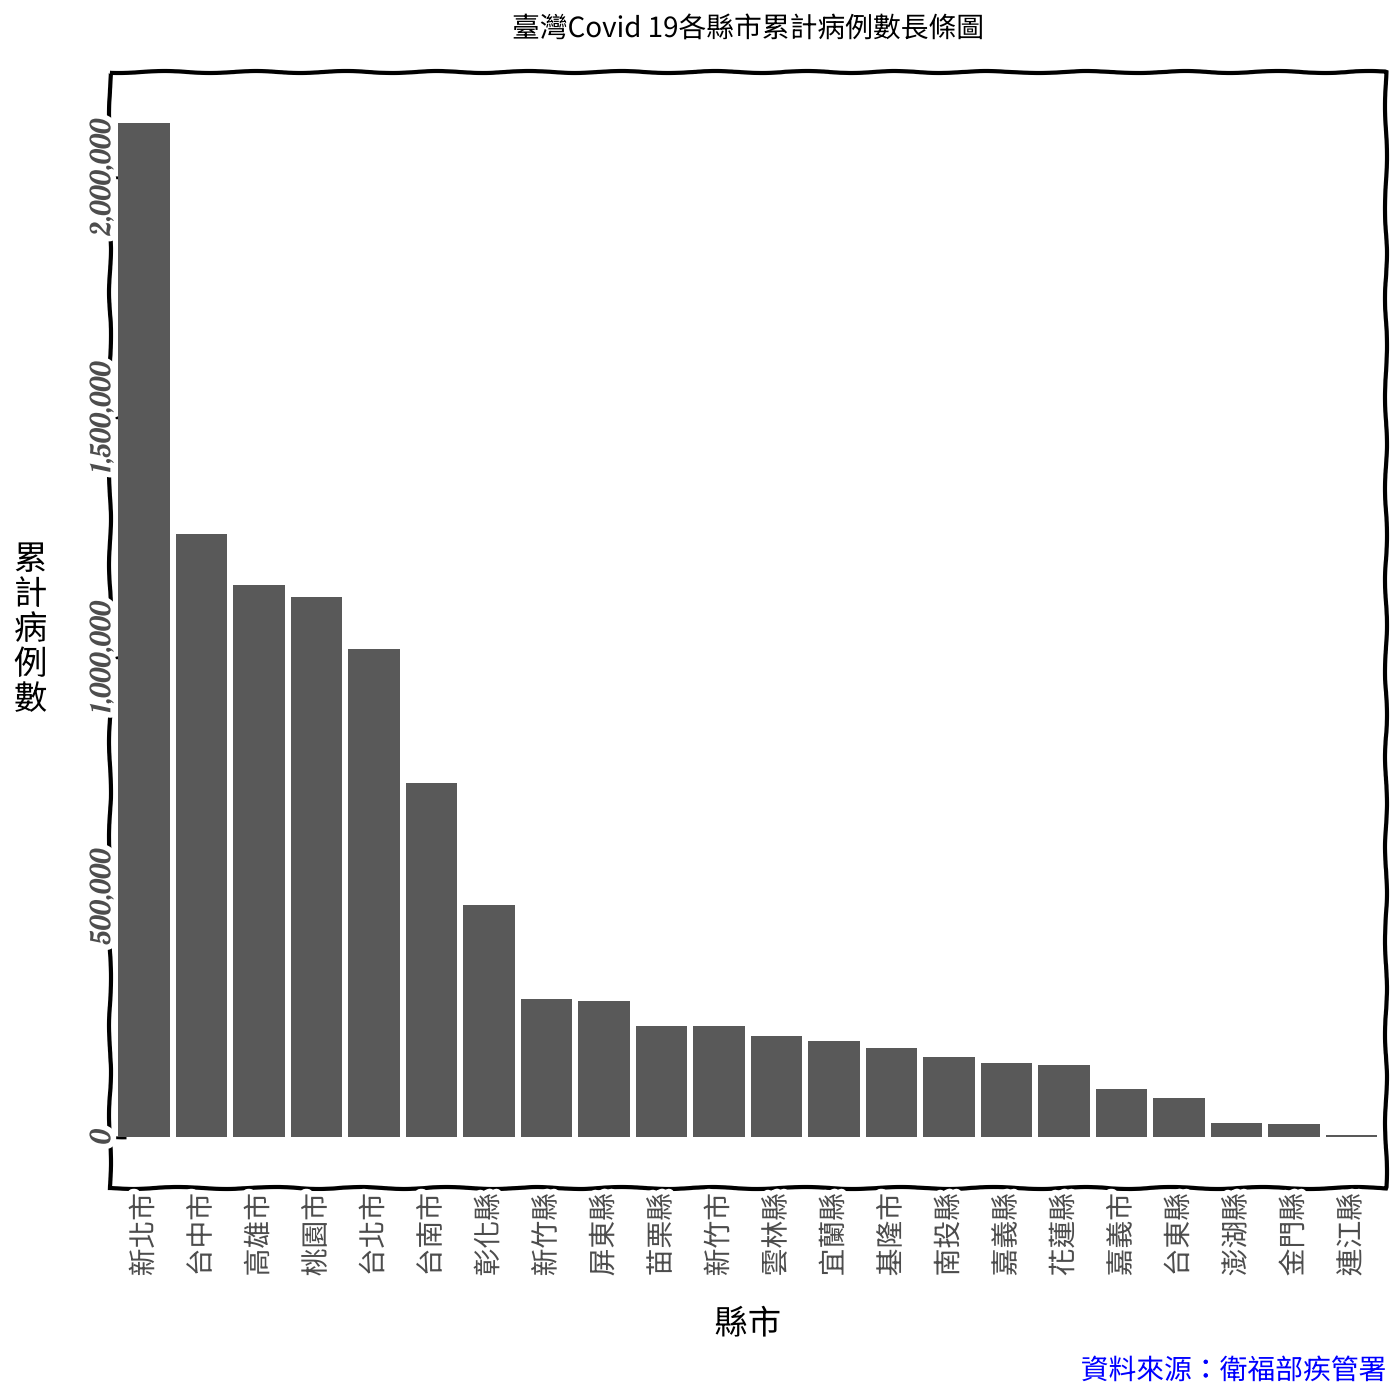

<Figure Size: (700 x 700)>

In [ ]:
from mizani.formatters import comma_format
ggplot(data=covid_df_county, mapping=aes(x='reorder(縣市, -累計病例數)', y='累計病例數')) +\
  geom_bar(stat='identity') +\
  scale_y_continuous(labels=comma_format()) +\
  labs(title='臺灣Covid 19各縣市累計病例數長條圖',
       x='縣市',
       y='累\n計\n病\n例\n數',
       caption='資料來源：衛福部疾管署') +\
  theme_xkcd() +\
  theme(text=element_text(fontproperties=kai),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=noto,
                                 rotation=90, size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 rotation=90, size=10, va='center', ha='center'), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color = "blue", linespacing = 1),
        figure_size=(7,7))

### 地圖

In [ ]:
import geopandas as gpd

[直轄市、縣市界線(TWD97經緯度)SHP格式](https://data.gov.tw/dataset/7442)

In [ ]:
df_county = gpd.read_file('./mapdata/COUNTY_MOI_1090820.shp', encoding='utf-8')
df_county

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,Z,09007,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,G,10002,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,P,10009,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."
5,C,10017,基隆市,Keelung City,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ..."
6,A,63000,臺北市,Taipei City,"POLYGON ((121.57098 25.19717, 121.57097 25.197..."
7,F,65000,新北市,New Taipei City,"POLYGON ((121.53752 25.30003, 121.53768 25.300..."
8,B,66000,臺中市,Taichung City,"POLYGON ((121.32834 24.43304, 121.32845 24.432..."
9,D,67000,臺南市,Tainan City,"POLYGON ((120.44025 23.41308, 120.44040 23.413..."


合併資料

In [ ]:
covid_df_county.columns

Index(['縣市', '累計病例數'], dtype='object')

In [ ]:
covid_county_df=pd.merge(df_county[['COUNTYNAME','geometry']], covid_df_county[['縣市','累計病例數']],
                         left_on='COUNTYNAME', right_on='縣市')
covid_county_df
#資料有少，因為台、臺不同

,COUNTYNAME,geometry,縣市,累計病例數
0,連江縣,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ...",連江縣,4083
1,宜蘭縣,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ...",宜蘭縣,199354
2,彰化縣,"POLYGON ((120.45655 24.20719, 120.48589 24.197...",彰化縣,482536
3,南投縣,"POLYGON ((121.27086 24.23661, 121.27108 24.236...",南投縣,166784
4,雲林縣,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ...",雲林縣,210796
5,基隆市,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ...",基隆市,184332
6,新北市,"POLYGON ((121.53752 25.30003, 121.53768 25.300...",新北市,2113960
7,桃園市,"POLYGON ((121.26381 25.12198, 121.26668 25.120...",桃園市,1125216
8,苗栗縣,"POLYGON ((121.00820 24.64432, 121.00828 24.644...",苗栗縣,231459
9,嘉義市,"POLYGON ((120.44758 23.51819, 120.44767 23.518...",嘉義市,98862


In [ ]:
df1=covid_df_county.copy() #複製一份
df1['縣市'] = df1['縣市'].str.replace('台','臺') #台 取代成 臺
df1

,縣市,累計病例數
0,南投縣,166784
1,臺中市,1256861
2,臺北市,1016387
3,臺南市,737745
4,臺東縣,80806
5,嘉義市,98862
6,嘉義縣,154213
7,基隆市,184332
8,宜蘭縣,199354
9,屏東縣,282523


In [ ]:
covid_county_df=pd.merge(df_county[['COUNTYNAME','geometry']], df1[['縣市','累計病例數']],
                         left_on='COUNTYNAME', right_on='縣市')
covid_county_df

,COUNTYNAME,geometry,縣市,累計病例數
0,連江縣,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ...",連江縣,4083
1,宜蘭縣,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ...",宜蘭縣,199354
2,彰化縣,"POLYGON ((120.45655 24.20719, 120.48589 24.197...",彰化縣,482536
3,南投縣,"POLYGON ((121.27086 24.23661, 121.27108 24.236...",南投縣,166784
4,雲林縣,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ...",雲林縣,210796
5,基隆市,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ...",基隆市,184332
6,臺北市,"POLYGON ((121.57098 25.19717, 121.57097 25.197...",臺北市,1016387
7,新北市,"POLYGON ((121.53752 25.30003, 121.53768 25.300...",新北市,2113960
8,臺中市,"POLYGON ((121.32834 24.43304, 121.32845 24.432...",臺中市,1256861
9,臺南市,"POLYGON ((120.44025 23.41308, 120.44040 23.413...",臺南市,737745


### 求各縣市中心點

In [ ]:
df_county_centroid = pd.DataFrame({'dist': df_county['COUNTYNAME'],
                                   'long': df_county.centroid.x,
                                   'lat': df_county.centroid.y})
df_county_centroid

,dist,long,lat
0,連江縣,120.044636,26.183488
1,宜蘭縣,121.645858,24.573779
2,彰化縣,120.468785,23.964589
3,南投縣,120.982077,23.842738
4,雲林縣,120.373193,23.686498
5,基隆市,121.721947,25.121696
6,臺北市,121.553296,25.082945
7,新北市,121.595366,24.987105
8,臺中市,120.892398,24.238211
9,臺南市,120.324758,23.150778


### 繪製累計確診人數分布圖

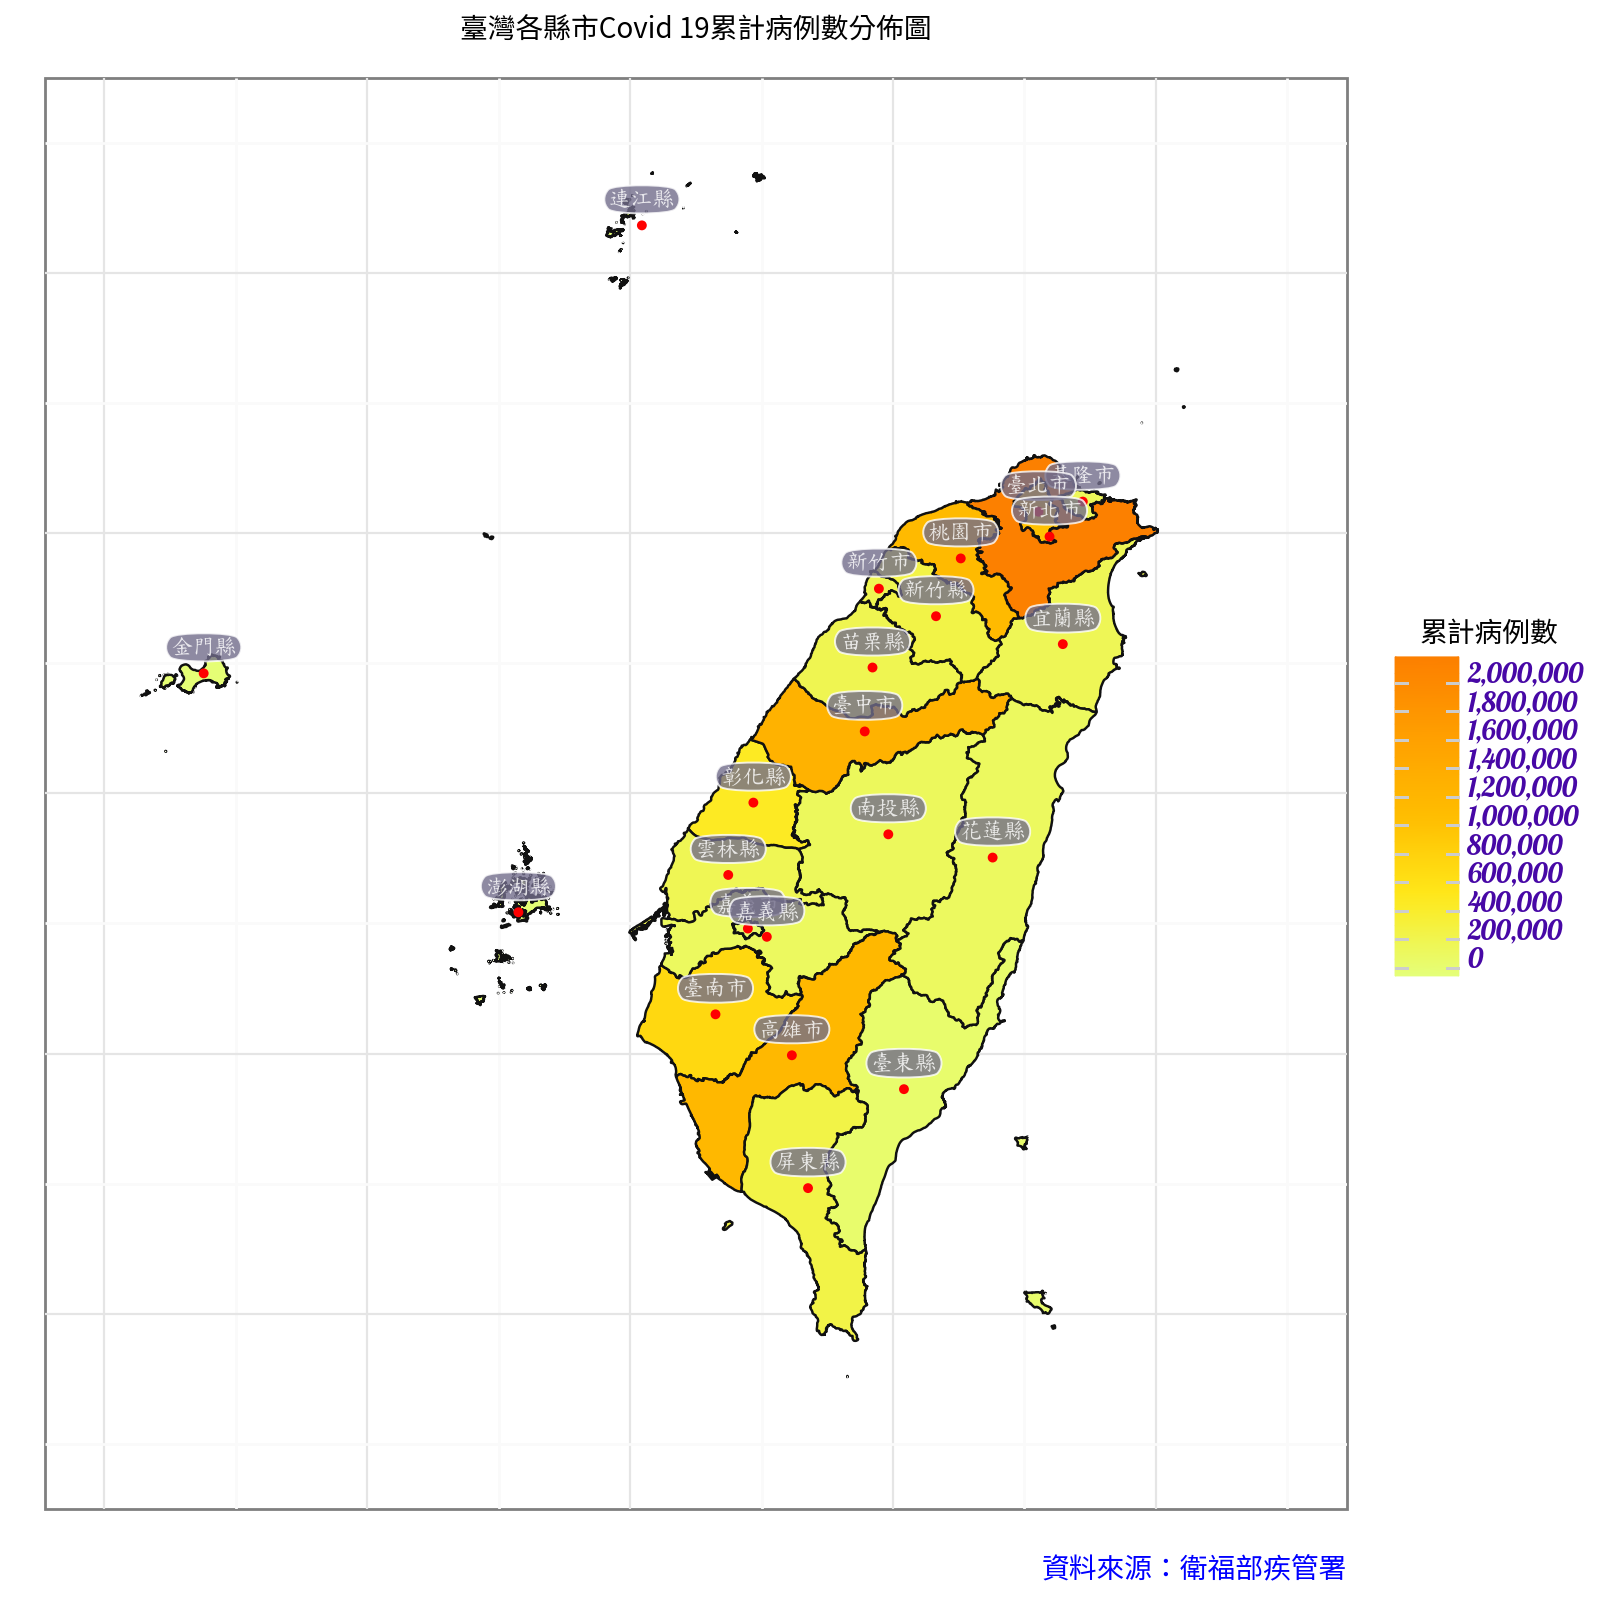

<Figure Size: (800 x 800)>

In [ ]:
from mizani.formatters import comma_format
# 不顯示座標軸文字與刻度
def no_labels(values):
    return [""] * len(values)
ggplot() +\
  geom_map(covid_county_df, aes(fill='累計病例數')) +\
  scale_x_continuous(limits=(118,122.5), labels=no_labels) +\
  scale_y_continuous(limits=(21.5,26.5), labels=no_labels) +\
  scale_color_cmap(cmap_name='Wistia', aesthetics=['fill'],
                   breaks=np.arange(0,np.max(covid_county_df['累計病例數'])+10000, 200000),
                       limits = [0, np.max(covid_county_df['累計病例數']+10000)],
                       labels = comma_format()) +\
  labs(title='臺灣各縣市Covid 19累計病例數分佈圖',
       x='',
       y='',
       caption='資料來源：衛福部疾管署') +\
  theme_bw() +\
  geom_point(data=df_county_centroid, mapping=aes(x='long', y='lat'), size=1, color='red') +\
  geom_label(data=df_county_centroid, mapping=aes(x='long', y='lat', label='dist'),
             nudge_y=0.1,family='DFKai-SB', boxstyle='round4', colour='white',
             fill='#726d8b', alpha=0.8, size=8) +\
  theme(text=element_text(family='DFKai-SB'),
        plot_title=element_text(fontproperties=noto,  ha='center'),
        axis_ticks=element_blank(),
        legend_title=element_text(fontproperties=noto, colour = 'black'),
        legend_text=element_text(fontproperties=lobster, colour = '#4708a6',
                                 va='baseline'),
        legend_position='right',
        legend_direction='vertical',
        legend_title_align='center',
        plot_caption=element_text(fontproperties=noto, color='blue', size=10),
        figure_size=(8,8))

### 計算鄉鎮市區累計確定病例數

In [ ]:
covid_df['縣市'] = covid_df['縣市'].str.replace('台','臺')

In [ ]:
#必須連縣市一起，因為部分鄉鎮名稱相同
covid_df_dist = (covid_df[['縣市','鄉鎮','確定病例數']]
                    .groupby(['縣市','鄉鎮'])
                    .agg('sum')
                    .reset_index()
                    .rename(columns={'確定病例數': '累計病例數'}))

In [ ]:
len(covid_df_dist)

368

In [ ]:
covid_df_dist.columns

Index(['縣市', '鄉鎮', '累計病例數'], dtype='object')

In [ ]:
covid_df_dist.head()

,縣市,鄉鎮,累計病例數
0,南投縣,中寮鄉,2954
1,南投縣,仁愛鄉,5021
2,南投縣,信義鄉,5284
3,南投縣,南投市,40699
4,南投縣,名間鄉,11631


### 繪製鄉鎮市區累計病例數分布圖－臺南市

In [ ]:
city = '臺南市'
df_city = covid_df_dist[covid_df_dist['縣市'] == city]
df_city

,縣市,鄉鎮,累計病例數
216,臺南市,七股區,5535
217,臺南市,下營區,6716
218,臺南市,中西區,27039
219,臺南市,仁德區,35822
220,臺南市,佳里區,20125
221,臺南市,六甲區,7653
222,臺南市,北區,53903
223,臺南市,北門區,1824
224,臺南市,南化區,1518
225,臺南市,南區,48328


In [ ]:
dist = gpd.read_file('./mapdata/TOWN_MOI_1120825.shp',encoding='utf-8')
dist

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40981 23.21370, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54845 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81624, 120.30198 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Lüdao Township,V,10014,"MULTIPOLYGON (((121.49154 22.67746, 121.49184 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61179 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((121.27481 23.92640, 121.27521 23.926..."
364,H09,68000090,桃園市,龍潭區,Longtan District,H,68000,"POLYGON ((121.19257 24.89410, 121.19262 24.894..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.19052 24.97122, 121.19059 24.971..."
366,A13,63000090,臺北市,南港區,Nangang District,A,63000,"POLYGON ((121.61426 25.06451, 121.61426 25.064..."


In [ ]:
dist_city = dist[dist['COUNTYNAME']==city]
dist_city

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
226,D09,67000010,臺南市,新營區,Xinying District,D,67000,"POLYGON ((120.35253 23.31405, 120.35244 23.313..."
227,D10,67000020,臺南市,鹽水區,Yanshui District,D,67000,"POLYGON ((120.29590 23.34086, 120.29583 23.340..."
228,D12,67000030,臺南市,白河區,Baihe District,D,67000,"POLYGON ((120.49514 23.39320, 120.49535 23.393..."
229,D13,67000050,臺南市,後壁區,Houbi District,D,67000,"POLYGON ((120.39029 23.33966, 120.39025 23.339..."
230,D15,67000070,臺南市,麻豆區,Madou District,D,67000,"POLYGON ((120.28993 23.20225, 120.28957 23.201..."
231,D16,67000080,臺南市,下營區,Xiaying District,D,67000,"POLYGON ((120.29936 23.26253, 120.29937 23.262..."
232,D17,67000090,臺南市,六甲區,Liujia District,D,67000,"POLYGON ((120.42398 23.24536, 120.42410 23.245..."
233,D18,67000100,臺南市,官田區,Guantian District,D,67000,"POLYGON ((120.43000 23.20070, 120.42981 23.200..."
234,D19,67000110,臺南市,大內區,Danei District,D,67000,"POLYGON ((120.45807 23.19233, 120.45807 23.192..."
235,D20,67000120,臺南市,佳里區,Jiali District,D,67000,"POLYGON ((120.19196 23.20965, 120.19194 23.209..."


In [ ]:
dist_city_centroid = pd.DataFrame({'dist': dist_city['TOWNNAME'],
                                 'long': dist_city.centroid.x,
                                 'lat': dist_city.centroid.y})
dist_city_centroid

,dist,long,lat
226,新營區,120.295423,23.301631
227,鹽水區,120.248305,23.298083
228,白河區,120.457854,23.351414
229,後壁區,120.348523,23.362113
230,麻豆區,120.241308,23.182577
231,下營區,120.264843,23.231140
232,六甲區,120.380023,23.227352
233,官田區,120.347988,23.191075
234,大內區,120.398813,23.144910
235,佳里區,120.178603,23.167087


In [ ]:
city_covid_df = (pd.merge(df_city[['鄉鎮', '累計病例數']],
                          dist_city[['TOWNNAME','geometry']],
                          left_on='鄉鎮', right_on='TOWNNAME')
                   .drop(columns = ['TOWNNAME']))
city_covid_df

,鄉鎮,累計病例數,geometry
0,七股區,5535,"POLYGON ((120.13989 23.19585, 120.14004 23.195..."
1,下營區,6716,"POLYGON ((120.29936 23.26253, 120.29937 23.262..."
2,中西區,27039,"POLYGON ((120.17477 23.00595, 120.17486 23.005..."
3,仁德區,35822,"POLYGON ((120.21669 22.96056, 120.21673 22.960..."
4,佳里區,20125,"POLYGON ((120.19196 23.20965, 120.19194 23.209..."
5,六甲區,7653,"POLYGON ((120.42398 23.24536, 120.42410 23.245..."
6,北區,53903,"POLYGON ((120.23308 22.99850, 120.23303 22.998..."
7,北門區,1824,"POLYGON ((120.14419 23.32308, 120.14436 23.322..."
8,南化區,1518,"POLYGON ((120.65344 23.22454, 120.65345 23.224..."
9,南區,48328,"POLYGON ((120.21636 22.96517, 120.21641 22.964..."


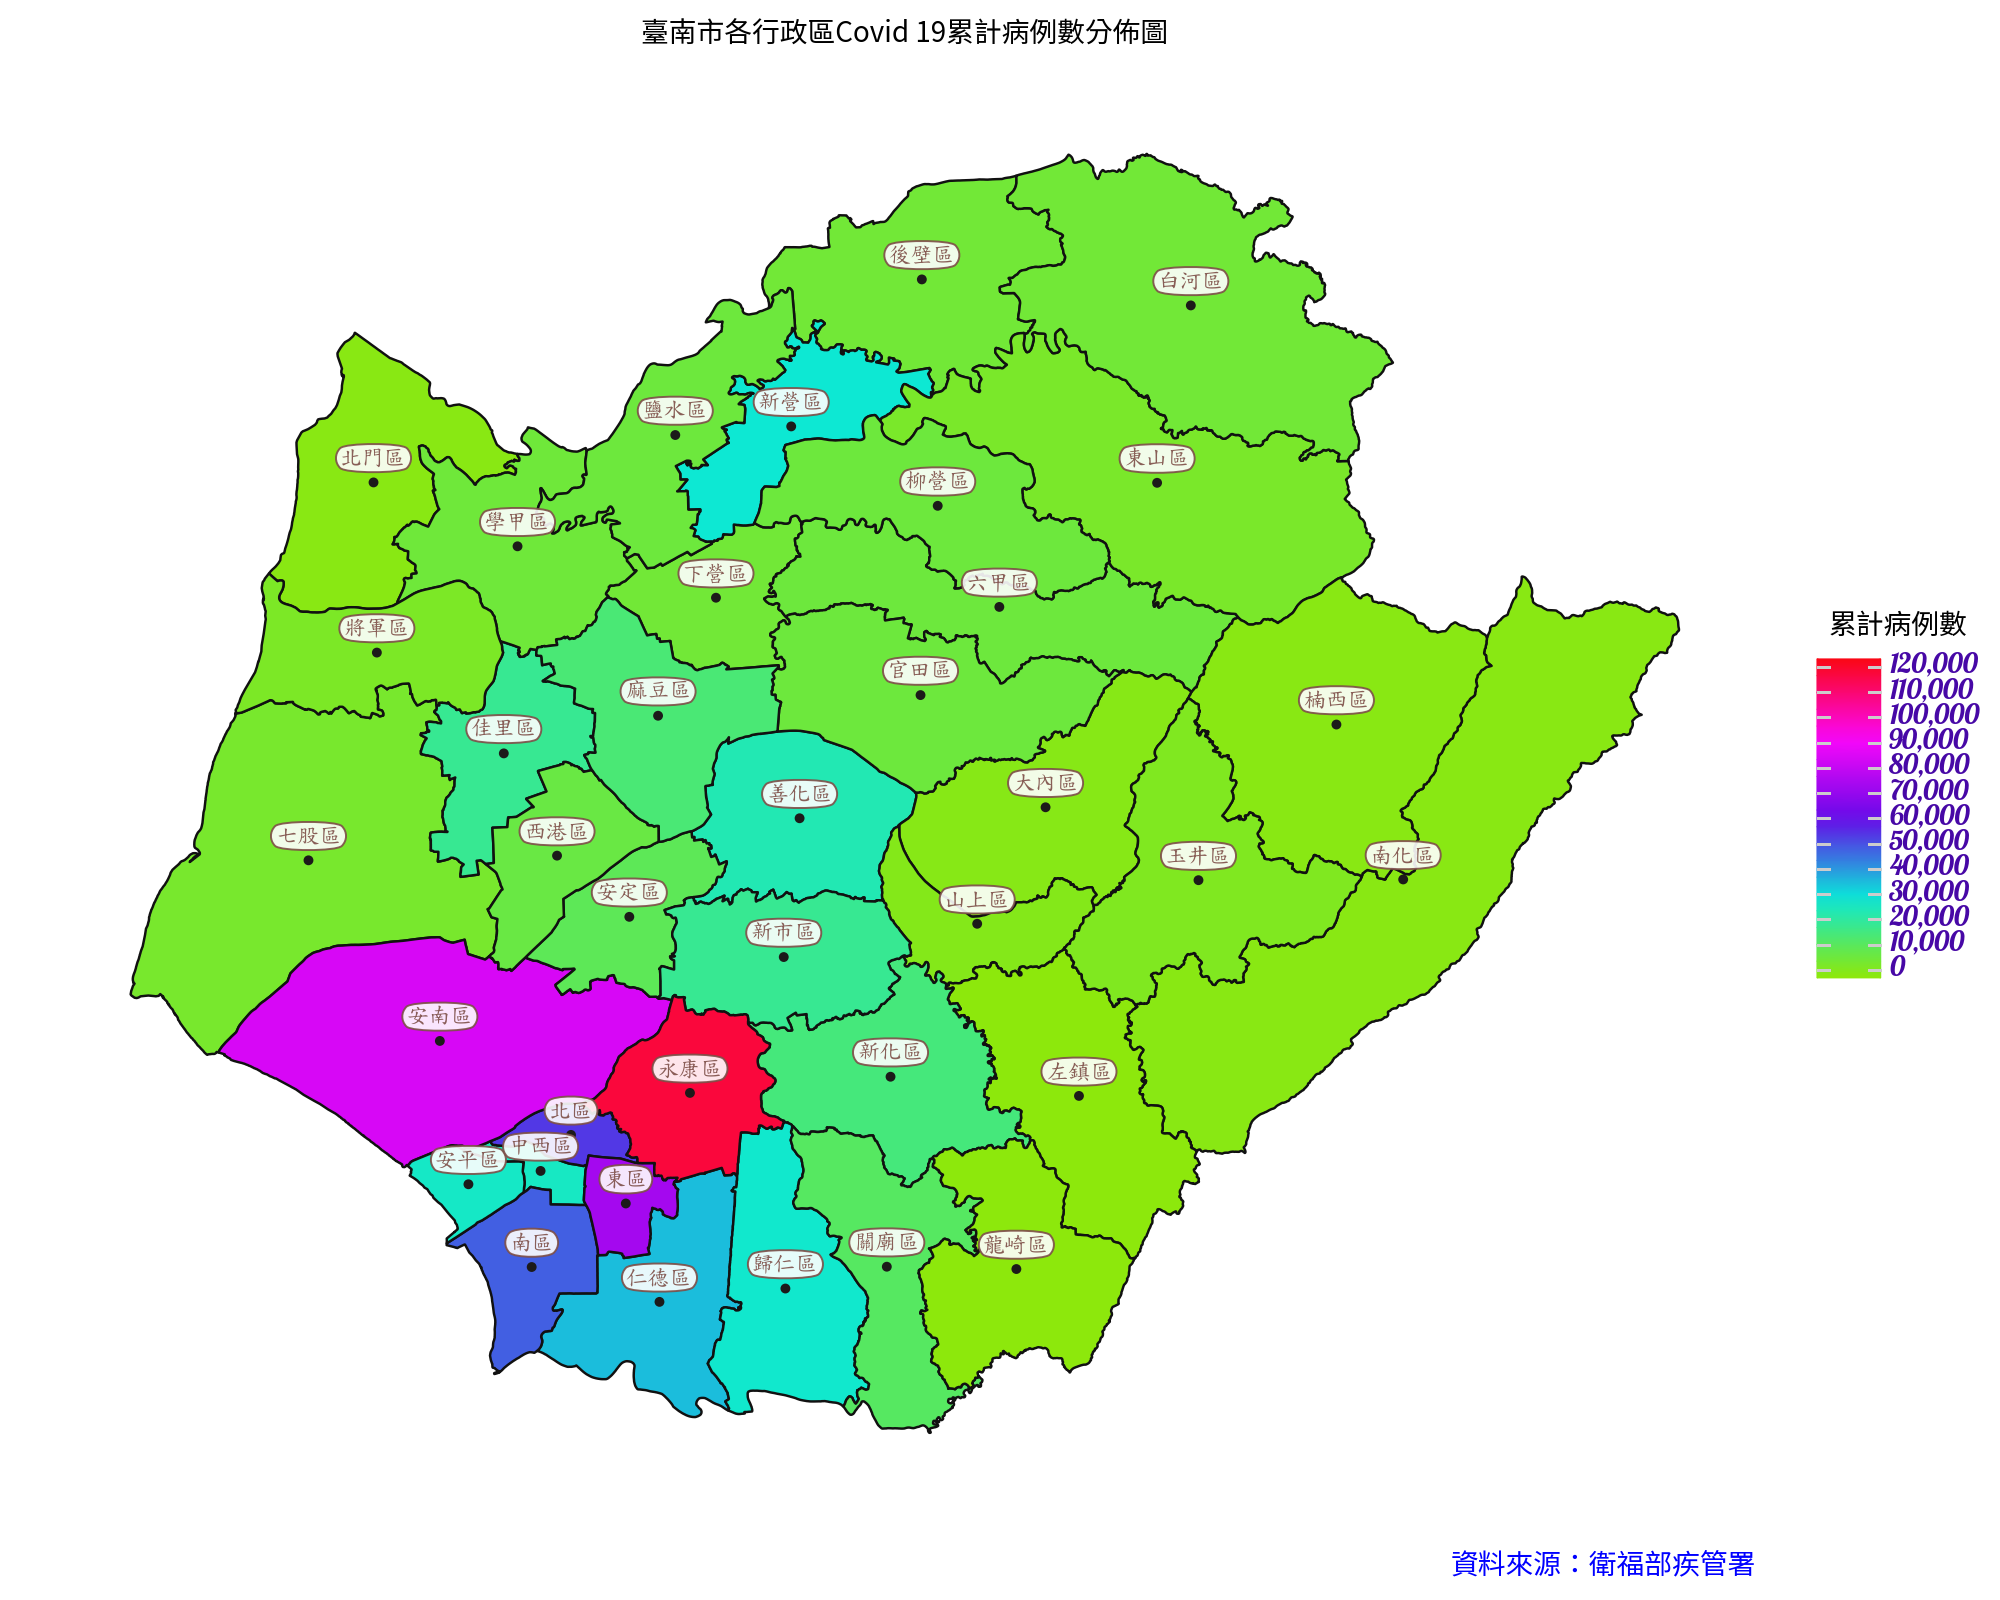

<Figure Size: (1000 x 800)>

In [ ]:
def no_labels(values):
    return [""] * len(values)
ggplot() +\
  geom_map(city_covid_df, aes(fill='累計病例數')) +\
  scale_x_continuous(labels=no_labels) +\
  scale_y_continuous(labels=no_labels) +\
  scale_color_gradientn(colors=['#8fe809', '#09e8d9','#6609e8','#fa07fa','#fa0714'],
                        breaks=np.arange(0, ((np.max(city_covid_df.累計病例數) // 10000) +2)*10000 ,10000),
                        limits=(0,((np.max(city_covid_df.累計病例數) // 10000) +1)*10000),
                        labels=comma_format(),
                        aesthetics=['fill']) +\
  labs(title=city+'各行政區Covid 19累計病例數分佈圖',
       x='',
       y='',
       caption='資料來源：衛福部疾管署') +\
  theme_classic() +\
  geom_point(data=dist_city_centroid, mapping=aes(x='long', y='lat'), size=1, color='#1c1a1a') +\
  geom_label(data=dist_city_centroid, mapping=aes(x='long', y='lat', label='dist'),
             nudge_y=0.01,family='DFKai-SB', boxstyle='round4', colour='#7d4e47',
             fill='white', alpha=0.9, size=8) +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,  ha='center'),
        plot_caption=element_text(fontproperties=noto, color='blue'),
        legend_title=element_text(fontproperties=noto),
        legend_text=element_text(fontproperties=lobster, colour = '#4708a6', va='baseline'),
        legend_position='right',
        legend_direction='vertical',
        legend_title_align='center',
        axis_line=element_blank(),
        axis_ticks=element_blank(),
        figure_size=(10,8))

## 分析二：各縣市累計病例數在時間上的變化

In [ ]:
np.sort(covid_df['發病日'].unique())

array(['2020-01-22T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', ...,
       '2024-06-02T00:00:00.000000000', '2024-06-03T00:00:00.000000000',
       '2024-06-04T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
Date1 = pd.DataFrame(data = {'發病日': pd.date_range(start=covid_df['發病日'].min(),
                                                     end=covid_df['發病日'].max())})
Date1

,發病日
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
1591,2024-05-31
1592,2024-06-01
1593,2024-06-02
1594,2024-06-03


In [ ]:
County1 = pd.DataFrame(data = {'縣市': covid_df['縣市'].unique()})
County1

,縣市
0,彰化縣
1,南投縣
2,新北市
3,桃園市
4,台南市
5,台中市
6,台北市
7,新竹市
8,基隆市
9,新竹縣


In [ ]:
#每個發病日*縣市，即每個發病日都有22個縣市
covid_county_daily = Date1.merge(County1, how='cross')
covid_county_daily

,發病日,縣市
0,2020-01-22,彰化縣
1,2020-01-22,南投縣
2,2020-01-22,新北市
3,2020-01-22,桃園市
4,2020-01-22,台南市
...,...,...
35107,2024-06-04,台東縣
35108,2024-06-04,嘉義市
35109,2024-06-04,澎湖縣
35110,2024-06-04,連江縣


In [ ]:
covid_county_daily.shape

(35112, 2)

In [ ]:
Date1.shape[0] * County1.shape[0]

35112

### 計算每日各縣市確定病例數

In [ ]:
covid_df_daily = (covid_df[['發病日','縣市','確定病例數']].groupby(['發病日','縣市'])
                                                        .sum()
                                                        .reset_index())

In [ ]:
len(covid_df_daily)

15684

以covid_df與covid_df_daily驗證是否相同

In [ ]:
covid_df[(covid_df['發病日'] == pd.to_datetime('2022-12-12', format='%Y-%m-%d')) &
          (covid_df['縣市'] == '南投縣')]['確定病例數'].sum()

280

In [ ]:
covid_df_daily[(covid_df_daily['發病日'] == pd.to_datetime('2022-12-12', format='%Y-%m-%d')) &
               (covid_df_daily['縣市'] == '南投縣')]

,發病日,縣市,確定病例數
6838,2022-12-12,南投縣,280


In [ ]:
#how = 'left' 以左邊為依據，因為右邊會有0值，會沒有欄位，merge需特別注意是否產生NaN
covid_county_daily = (covid_county_daily.merge(covid_df_daily[['發病日','縣市','確定病例數']],
                                                 left_on=['發病日','縣市'],
                                                 right_on=['發病日','縣市'],
                                                 how='left')
                                                 .fillna(value={'確定病例數': 0}))
covid_county_daily

,發病日,縣市,確定病例數_x,確定病例數_y,確定病例數
0,2020-01-22,彰化縣,NaN,NaN,0.0
1,2020-01-22,南投縣,NaN,NaN,0.0
2,2020-01-22,新北市,1.0,1.0,1.0
3,2020-01-22,桃園市,NaN,NaN,0.0
4,2020-01-22,台南市,NaN,NaN,0.0
...,...,...,...,...,...
35107,2024-06-04,台東縣,1.0,1.0,1.0
35108,2024-06-04,嘉義市,1.0,1.0,1.0
35109,2024-06-04,澎湖縣,NaN,NaN,0.0
35110,2024-06-04,連江縣,NaN,NaN,0.0


In [ ]:
covid_county_daily['確定病例數'] = covid_county_daily['確定病例數'].astype('int')

In [ ]:
#以縣市分組以後對作確定病例數累計
covid_county_daily['累計病例數'] = covid_county_daily.groupby(['縣市'])['確定病例數'].cumsum()

In [ ]:
covid_county_daily[covid_county_daily['縣市']=='台南市'].tail()

,發病日,縣市,確定病例數_x,確定病例數_y,確定病例數,累計病例數
35006,2024-05-31,台南市,2.0,2.0,2,737738
35028,2024-06-01,台南市,1.0,1.0,1,737739
35050,2024-06-02,台南市,3.0,3.0,3,737742
35072,2024-06-03,台南市,2.0,2.0,2,737744
35094,2024-06-04,台南市,1.0,1.0,1,737745


### 趨勢圖

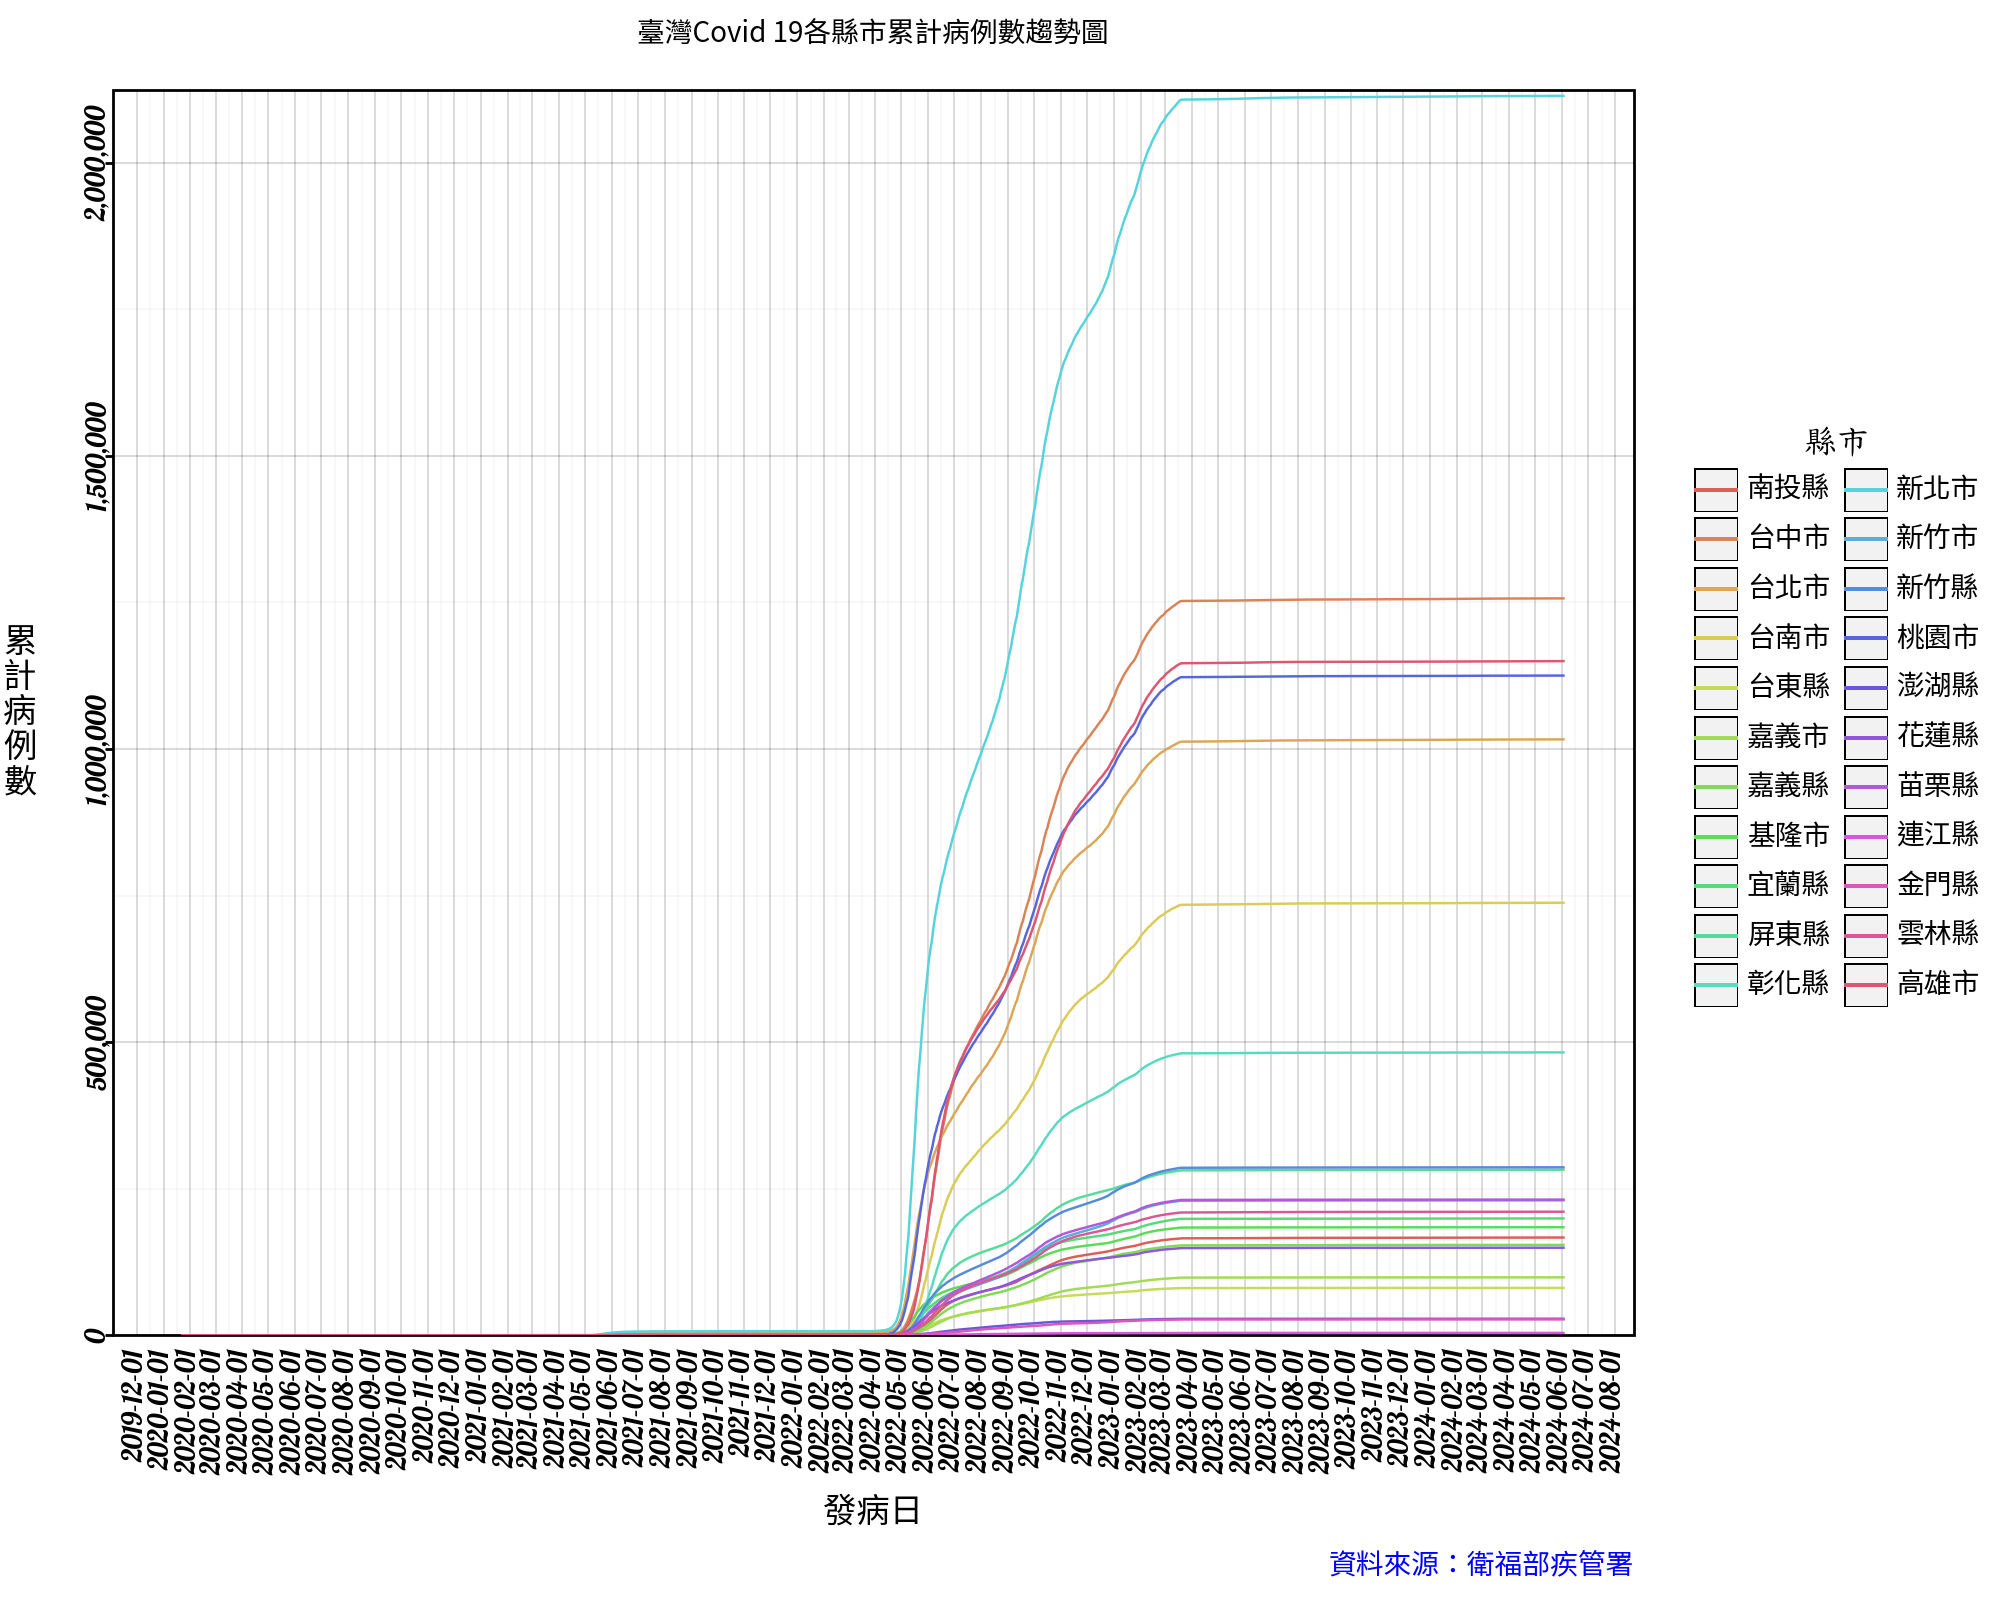

<Figure Size: (1000 x 800)>

In [ ]:
ggplot(covid_county_daily, aes(x='發病日', y='累計病例數', color='縣市')) +\
  geom_line() +\
  scale_y_continuous(expand=(0,0), limits=[0,max(covid_county_daily['累計病例數'])+1e4],
                     labels=comma_format()) +\
  scale_x_date(date_breaks='1 month') +\
  labs(title='臺灣Covid 19各縣市累計病例數趨勢圖',
       x='發病日',
       y='累\n計\n病\n例\n數',
       caption='資料來源：衛福部疾管署') +\
  theme_linedraw() +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  ha='center', size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=lobster,
                                 rotation=90, size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 rotation=90, size=10, va='center', ha='center'), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
        legend_title=element_text(fontproperties=kai, size=12), # 圖例標題
        legend_title_align='center',
        legend_text=element_text(fontproperties=noto, size=10), # 圖例文字
        figure_size=(10,8))

## 分析三：各縣市每日新增病例數

### 以年繪製熱圖

### 確定病例數熱圖

In [ ]:
covid_county_daily.head()

,發病日,縣市,確定病例數_x,確定病例數_y,確定病例數,累計病例數
0,2020-01-22,彰化縣,NaN,NaN,0,0
1,2020-01-22,南投縣,NaN,NaN,0,0
2,2020-01-22,新北市,1.0,1.0,1,1
3,2020-01-22,桃園市,NaN,NaN,0,0
4,2020-01-22,台南市,NaN,NaN,0,0


In [ ]:
covid_county_daily['year']=covid_county_daily['發病日'].dt.year

In [ ]:
covid_county_daily['month']=covid_county_daily['發病日'].dt.month

In [ ]:
county_year= (covid_county_daily[['縣市','確定病例數','year']]
  .groupby(['縣市','year'])
  .sum()
  .reset_index())
county_year

,縣市,year,確定病例數
0,南投縣,2020,1
1,南投縣,2021,37
2,南投縣,2022,145159
3,南投縣,2023,21255
4,南投縣,2024,332
...,...,...,...
105,高雄市,2020,0
106,高雄市,2021,94
107,高雄市,2022,982011
108,高雄市,2023,166847


In [ ]:
county_order = ['基隆市', '新北市', '台北市', '桃園市', '新竹縣', '新竹市',
                '苗栗縣', '台中市', '彰化縣', '南投縣', '雲林縣', '嘉義縣',
                '嘉義市', '台南市', '高雄市', '屏東縣', '宜蘭縣',  '花蓮縣',
                '台東縣', '澎湖縣', '金門縣', '連江縣']

In [ ]:
from pandas.api.types import CategoricalDtype
cat_type_county = CategoricalDtype(categories=county_order, ordered=True)
county_year['縣市']=county_year['縣市'].astype(cat_type_county)

In [ ]:
county_year_crosstab = (pd.crosstab(covid_county_daily['縣市'], covid_county_daily['year'],
                                    covid_county_daily['確定病例數'], aggfunc='sum')
                          .reset_index()
                          .melt(id_vars='縣市', var_name='年', value_name='人數'))
county_year_crosstab

,縣市,年,人數
0,南投縣,2020,1
1,台中市,2020,5
2,台北市,2020,8
3,台南市,2020,1
4,台東縣,2020,0
...,...,...,...
105,苗栗縣,2024,151
106,連江縣,2024,1
107,金門縣,2024,34
108,雲林縣,2024,250


In [ ]:
from pandas.api.types import CategoricalDtype
cat_type_county = CategoricalDtype(categories=county_order, ordered=True)
county_year_crosstab['縣市']=county_year_crosstab['縣市'].astype(cat_type_county)

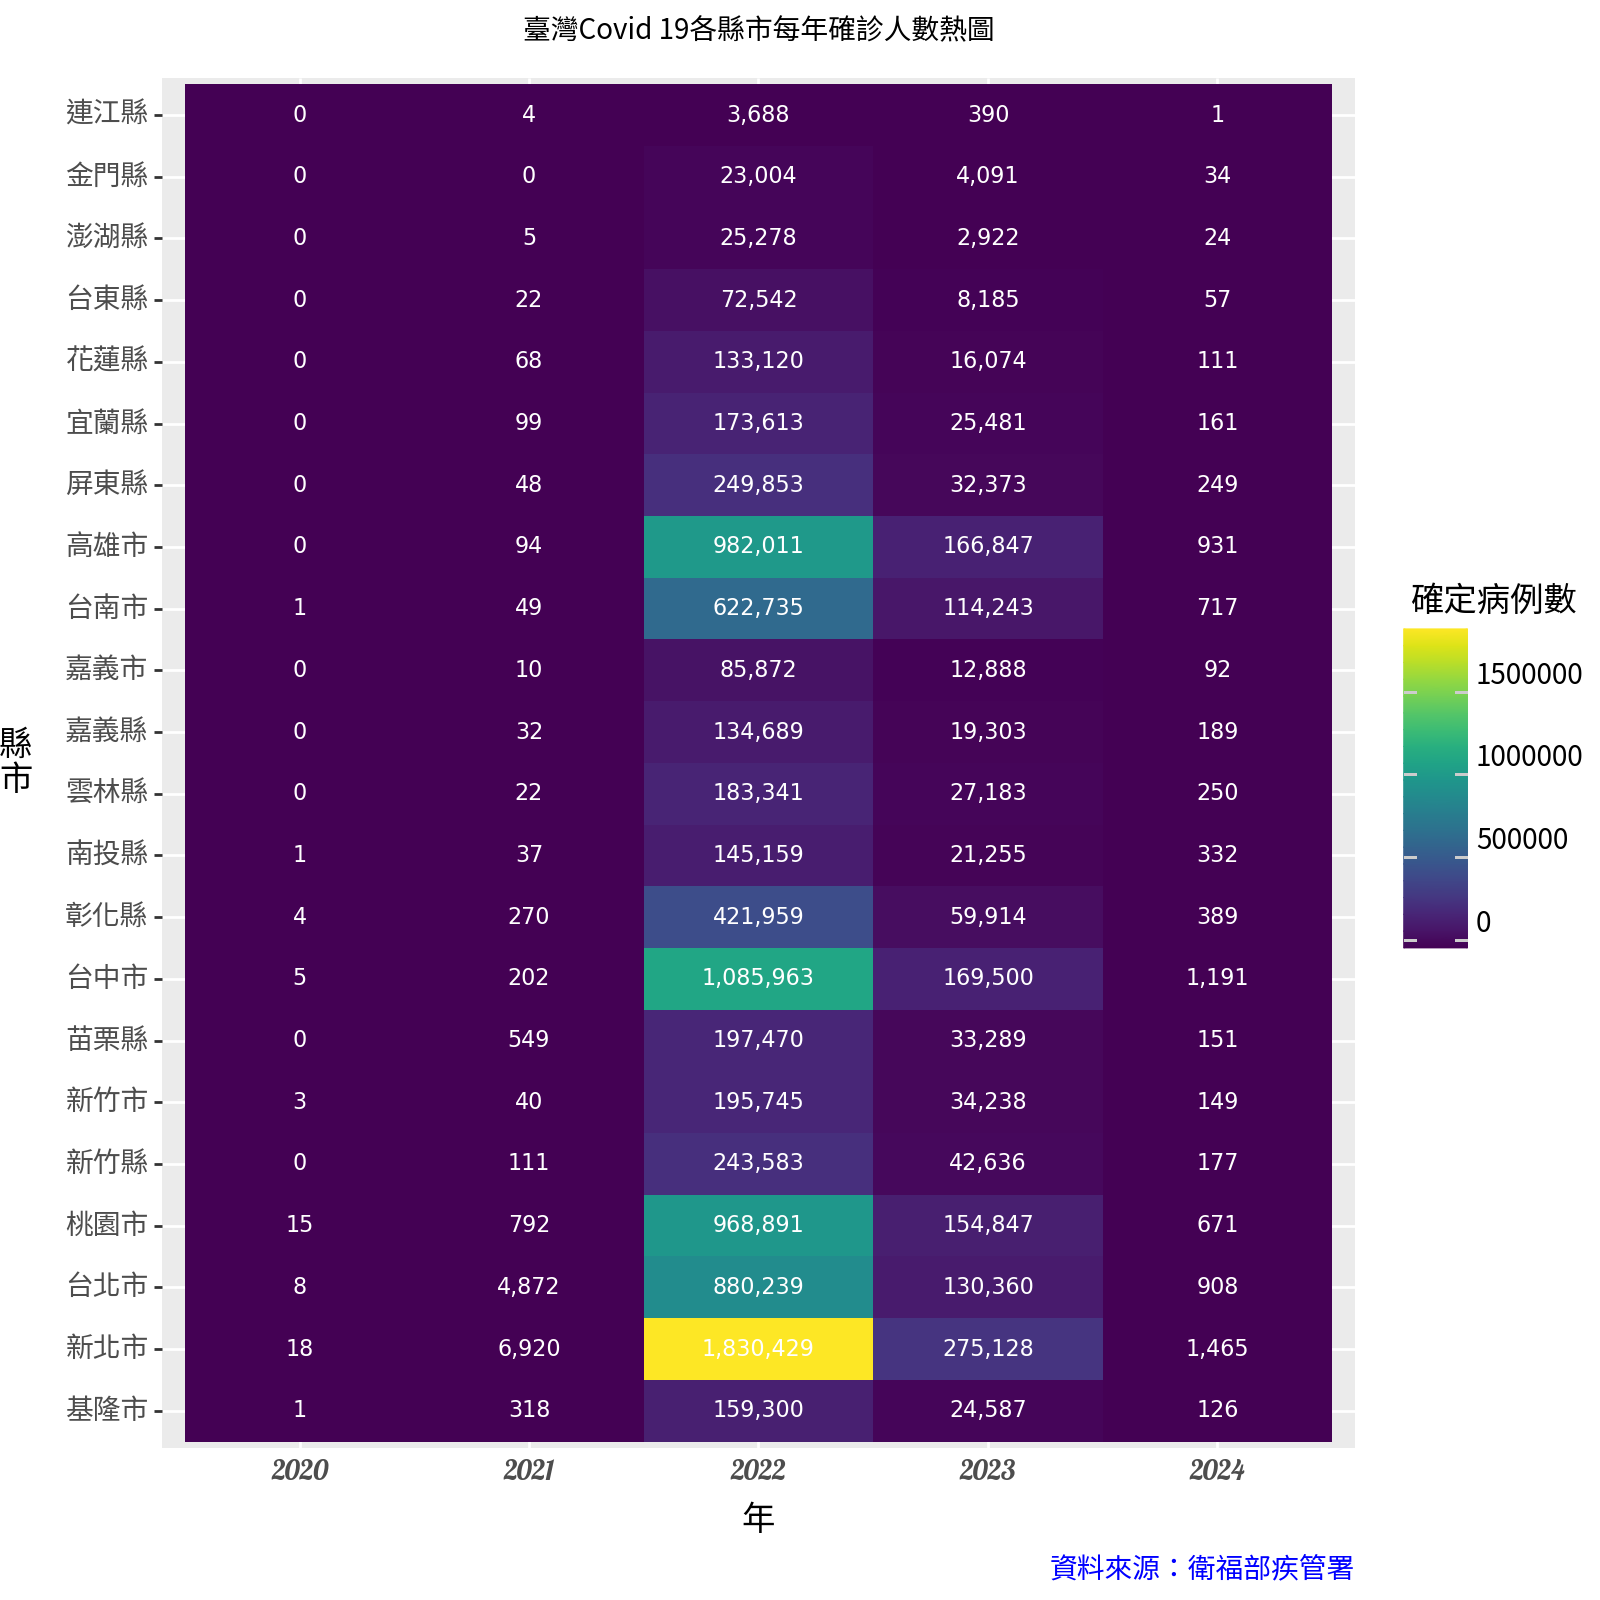

<Figure Size: (800 x 800)>

In [ ]:
from mizani.formatters import comma_format
ggplot(county_year_crosstab, aes(x='年', y='縣市', fill='人數')) + \
  geom_tile() + \
  labs(
      title='臺灣Covid 19各縣市每年確診人數熱圖',
      x='年',
      y='縣\n市',
      fill='確定病例數',
      caption='資料來源：衛福部疾管署') + \
  geom_text(aes(label='comma_format()(人數)'), color='white', size=8) + \
  theme(
      text=element_text(fontproperties=noto),
      plot_title=element_text(fontproperties=noto, weight='bold', ha='center', size=14),  # 標題格式
      axis_title_x=element_text(fontproperties=noto, style='italic', ha='center', size=12),  # x軸標題格式
      axis_title_y=element_text(fontproperties=noto, va='center', ha='center', size=12, rotation=0, linespacing=1),  # y軸標題格式
      axis_text_x=element_text(fontproperties=lobster, size=10, ha='center'),  # x軸文字格式
      axis_text_y=element_text(fontproperties=noto, size=10),  # y軸文字格式
      axis_ticks_major_x=element_blank(),
      plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
      legend_title=element_text(fontproperties=noto, size=12),  # 圖例標題
      legend_position='right',
      legend_direction='vertical',
      legend_title_align='center',
      legend_text=element_text(fontproperties=noto, size=10),  # 圖例文字
      figure_size=(8, 8)
  )

### 線圖

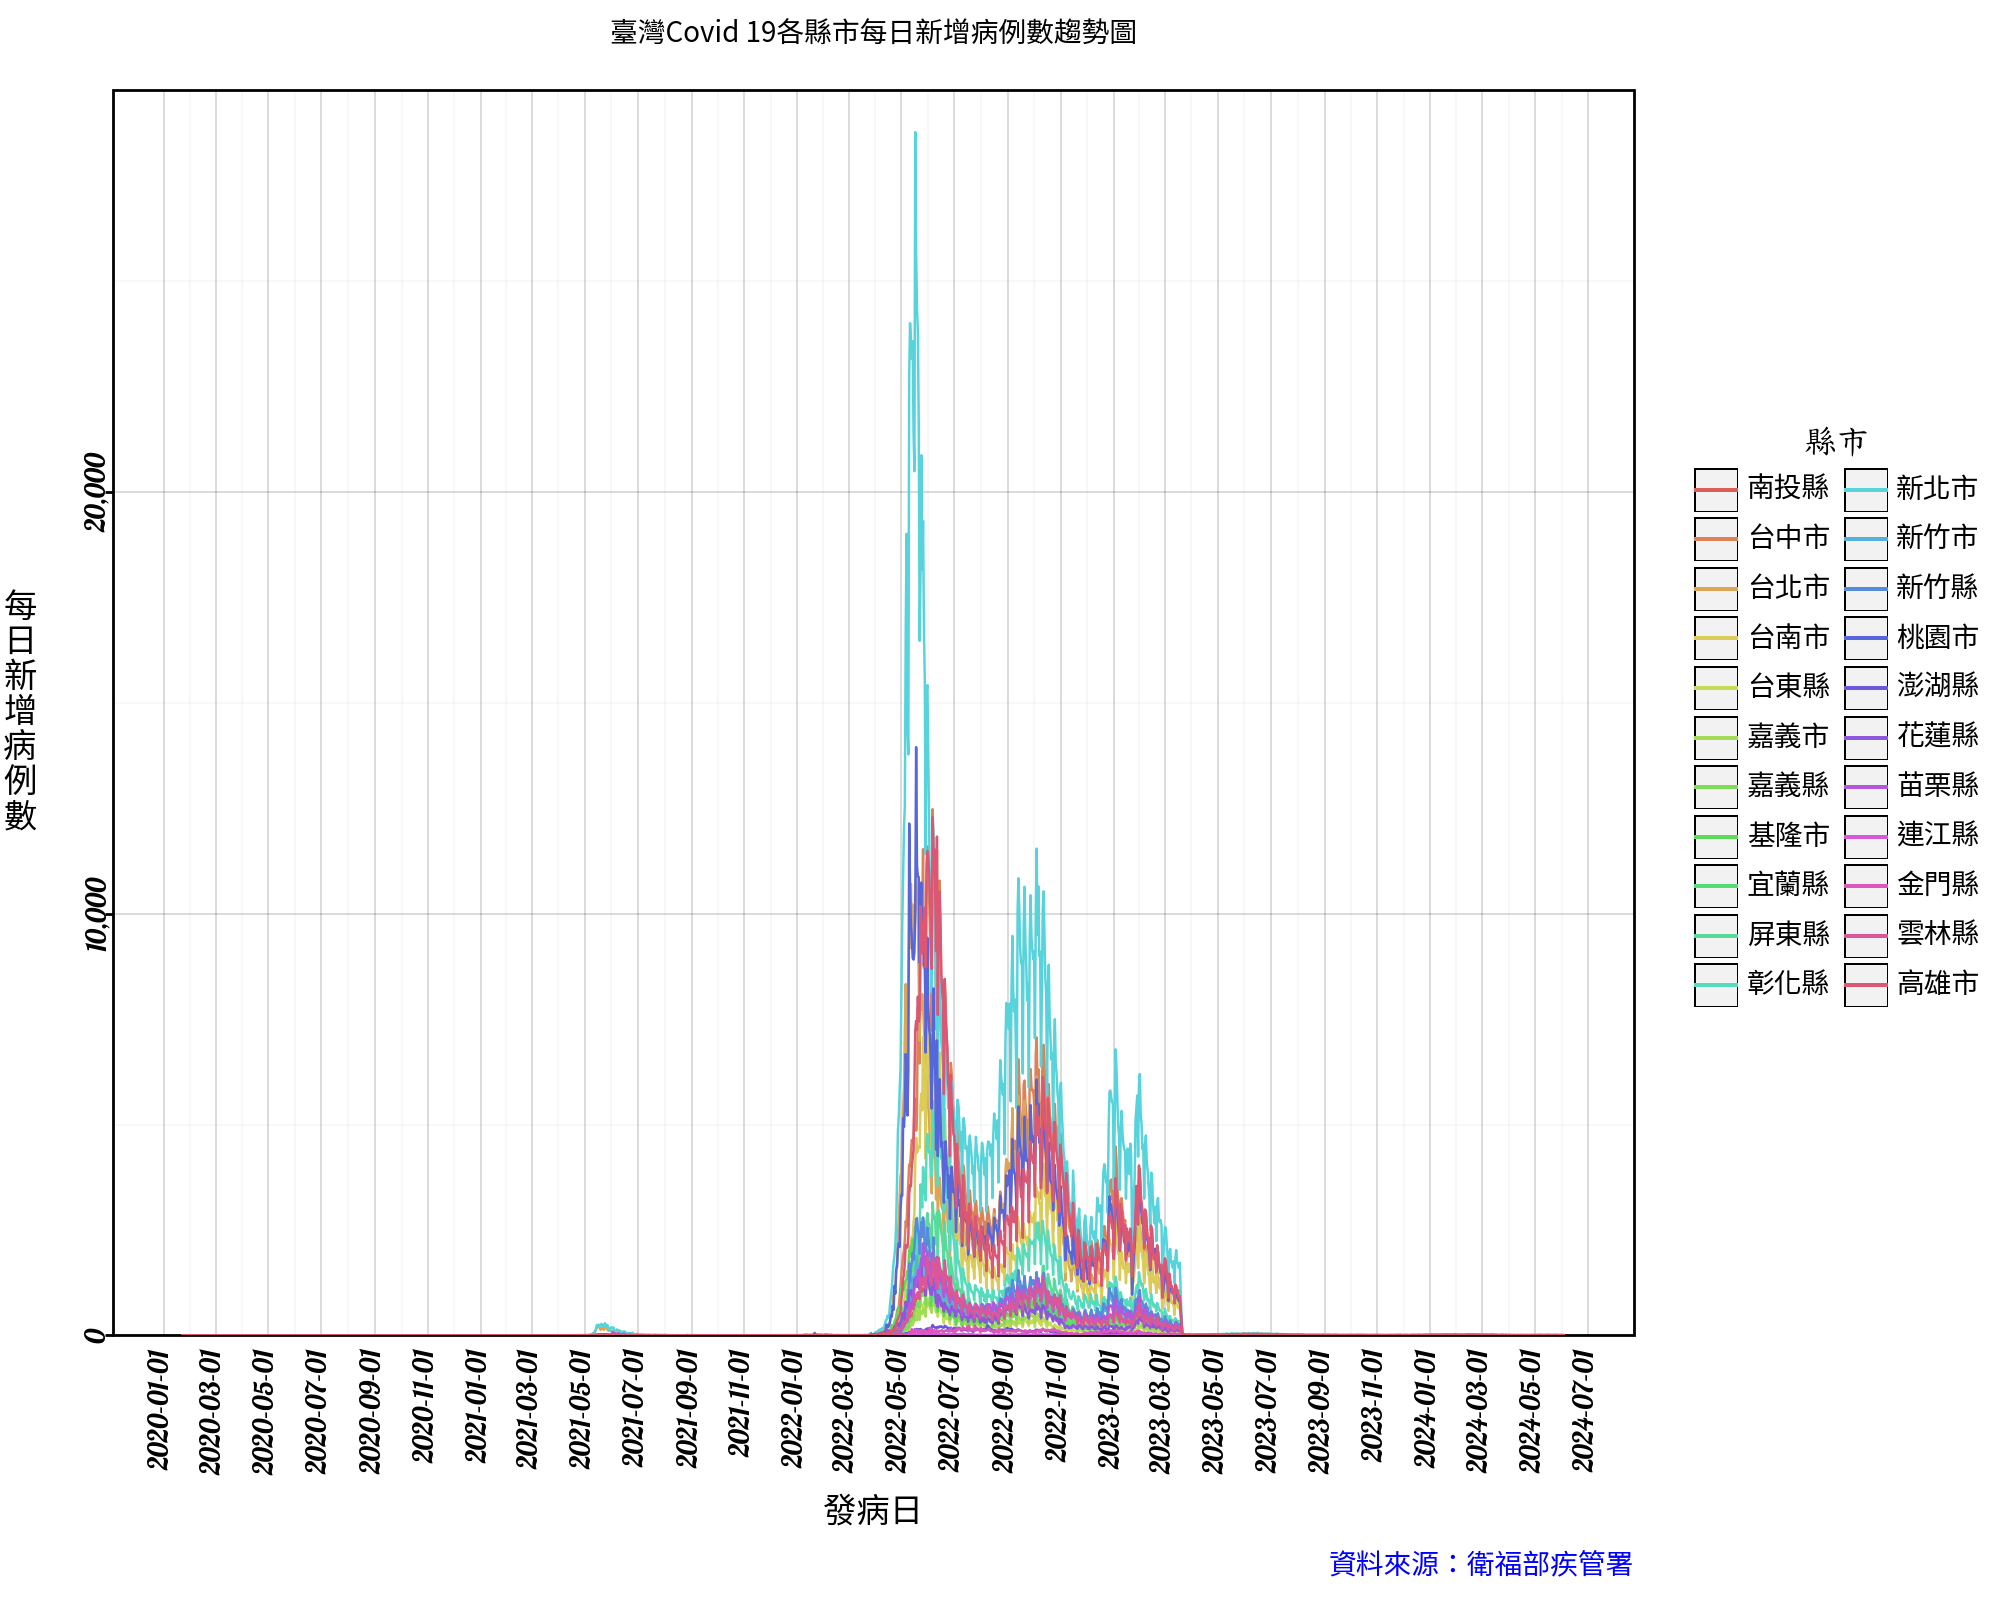

<Figure Size: (1000 x 800)>

In [ ]:
ggplot(covid_county_daily, aes(x='發病日', y='確定病例數', color='縣市')) +\
  geom_line() +\
  scale_y_continuous(expand=(0,0), limits=[0,max(covid_county_daily['確定病例數'])+1e3],
                     labels=comma_format()) +\
  scale_x_date(date_breaks='2 month') +\
  labs(title='臺灣Covid 19各縣市每日新增病例數趨勢圖',
       x='發病日',
       y='每\n日\n新\n增\n病\n例\n數',
       caption='資料來源：衛福部疾管署') +\
  theme_linedraw() +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  ha='center', size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=lobster,
                                 rotation=90, size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 rotation=90, size=10, va='center', ha='center'), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
        legend_title=element_text(fontproperties=kai, size=12), # 圖例標題
        legend_title_align='center',
        legend_text=element_text(fontproperties=noto, size=10), # 圖例文字
        figure_size=(10,8))

各縣市每日新增確診數敘述統計

In [ ]:
#多重索引
(covid_county_daily[['縣市','確定病例數']].groupby('縣市')
    .describe()
    .round(1)
    .sort_values(by=('確定病例數', 'max'), axis='index', ascending=False)
    .T)

縣市               新北市      桃園市      台中市      高雄市      台北市     台南市     彰化縣  \
確定病例數 count   1596.0   1596.0   1596.0   1596.0   1596.0  1596.0  1596.0   
      mean    1324.5    705.0    787.5    720.5    636.8   462.2   302.3   
      std     3361.4   1700.3   1873.9   1789.3   1537.9  1103.9   774.9   
      min        0.0      0.0      0.0      0.0      0.0     0.0     0.0   
      25%        0.0      0.0      0.0      0.0      0.0     0.0     0.0   
      50%        6.0      2.0      2.0      2.0      3.0     1.0     0.0   
      75%       50.0     17.0     20.0     20.0     32.0    16.0     8.0   
      max    28537.0  13950.0  12481.0  12291.0  10880.0  7402.0  6206.0   

縣市              屏東縣     新竹縣     基隆市  ...     苗栗縣     南投縣     雲林縣     花蓮縣  \
確定病例數 count  1596.0  1596.0  1596.0  ...  1596.0  1596.0  1596.0  1596.0   
      mean    177.0   179.5   115.5  ...   145.0   104.5   132.1    93.6   
      std     456.8   421.4   296.7  ...   335.5   255.7   309.5   228.1   
      min       0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
      25%       0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
      50%       0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
      75%       7.0     5.0     6.0  ...     4.0     6.0     6.0     4.0   
      max    3153.0  2796.0  2591.0  ...  2176.0  1875.0  1846.0  1632.0   

縣市              嘉義縣     嘉義市     台東縣     澎湖縣     金門縣     連江縣  
確定病例數 count  1596.0  1596.0  1596.0  1596.0  1596.0  1596.0  
      mean     96.6    61.9    50.6    17.7    17.0     2.6  
      std     231.7   148.2   129.8    43.1    38.3     6.7  
      min       0.0     0.0     0.0     0.0     0.0     0.0  
      25%       0.0     0.0     0.0     0.0     0.0     0.0  
      50%       0.0     0.0     0.0     0.0     0.0     0.0  
      75%       4.0     3.0     2.0     1.0     1.0     0.0  
      max    1578.0  1066.0   877.0   247.0   228.0    46.0  

[8 rows x 22 columns]

In [ ]:
date1 = pd.to_datetime('2022-4-1', format='%Y-%m-%d')
date2 = pd.to_datetime('2023-4-1', format='%Y-%m-%d')

In [ ]:
#特定期間的發病日(between內的參數須為datatime格式)
covid_county_daily_between = covid_county_daily[covid_county_daily['發病日'].between(date1, date2)]

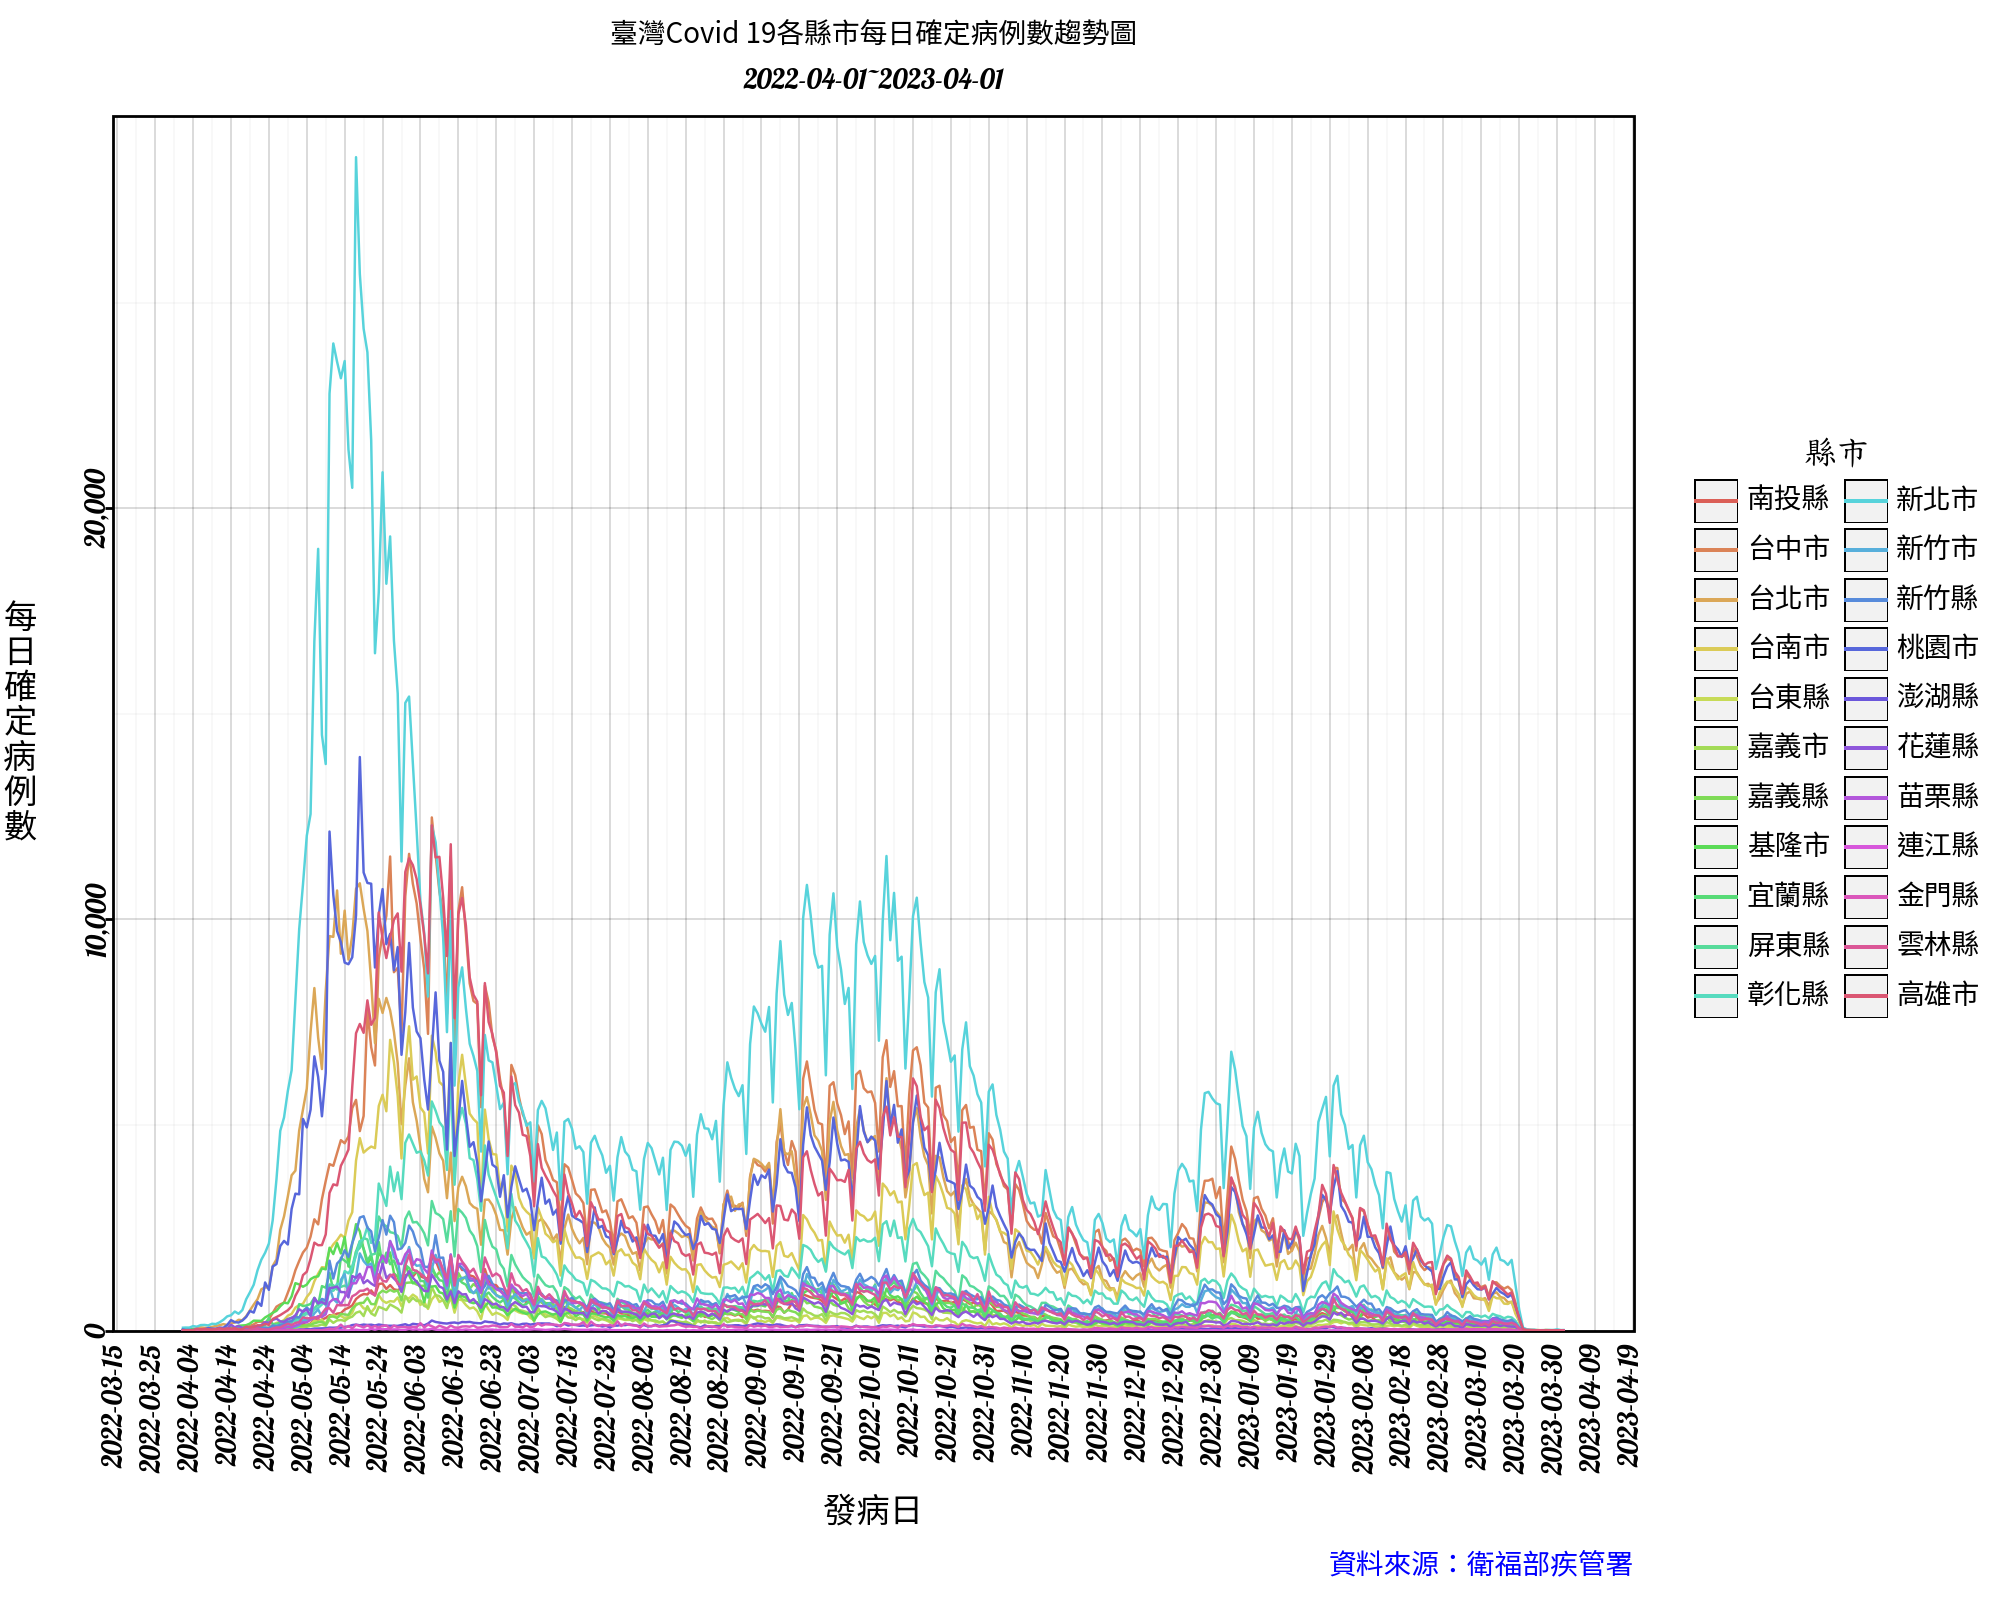

<Figure Size: (1000 x 800)>

In [ ]:
#時間區間用subtitles
from mizani.formatters import comma_format
ggplot(covid_county_daily_between, aes(x='發病日', y='確定病例數', color='縣市')) +\
  geom_line() +\
  scale_y_continuous(expand=(0,0), limits=[0,max(covid_county_daily_between['確定病例數'])+1e3],
                     labels=comma_format()) +\
  scale_x_date(date_breaks='10 days') +\
  labs(title='臺灣Covid 19各縣市每日確定病例數趨勢圖',
       subtitle= str(date1.date()) + '~' + str(date2.date()),
       x='發病日',
       y='每\n日\n確\n定\n病\n例\n數',
       caption='資料來源：衛福部疾管署') +\
  theme_linedraw() +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        plot_subtitle=element_text(fontproperties=lobster,
                                weight='bold', ha='center', size=10, linespacing=1.5),  # 副標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  ha='center', size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=lobster,
                                 rotation=90, size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 rotation=90, size=10, va='center', ha='center'), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
        legend_title=element_text(fontproperties=kai, size=12), # 圖例標題
        legend_title_align='center',
        legend_text=element_text(fontproperties=noto, size=10), # 圖例文字
        figure_size=(10,8))

## 分析四：性別、年齡與確定病例數

### 性別的長條圖

In [ ]:
gender_df = (covid_df[['性別','確定病例數']]
               .groupby(['性別'], observed=True)
               .sum()
               .reset_index())
gender_df

,性別,確定病例數
0,女,5457834
1,男,4759379


In [ ]:
gender_df['比例'] = (gender_df['確定病例數'] / sum(gender_df['確定病例數'])) * 100

顯示次數與百分比

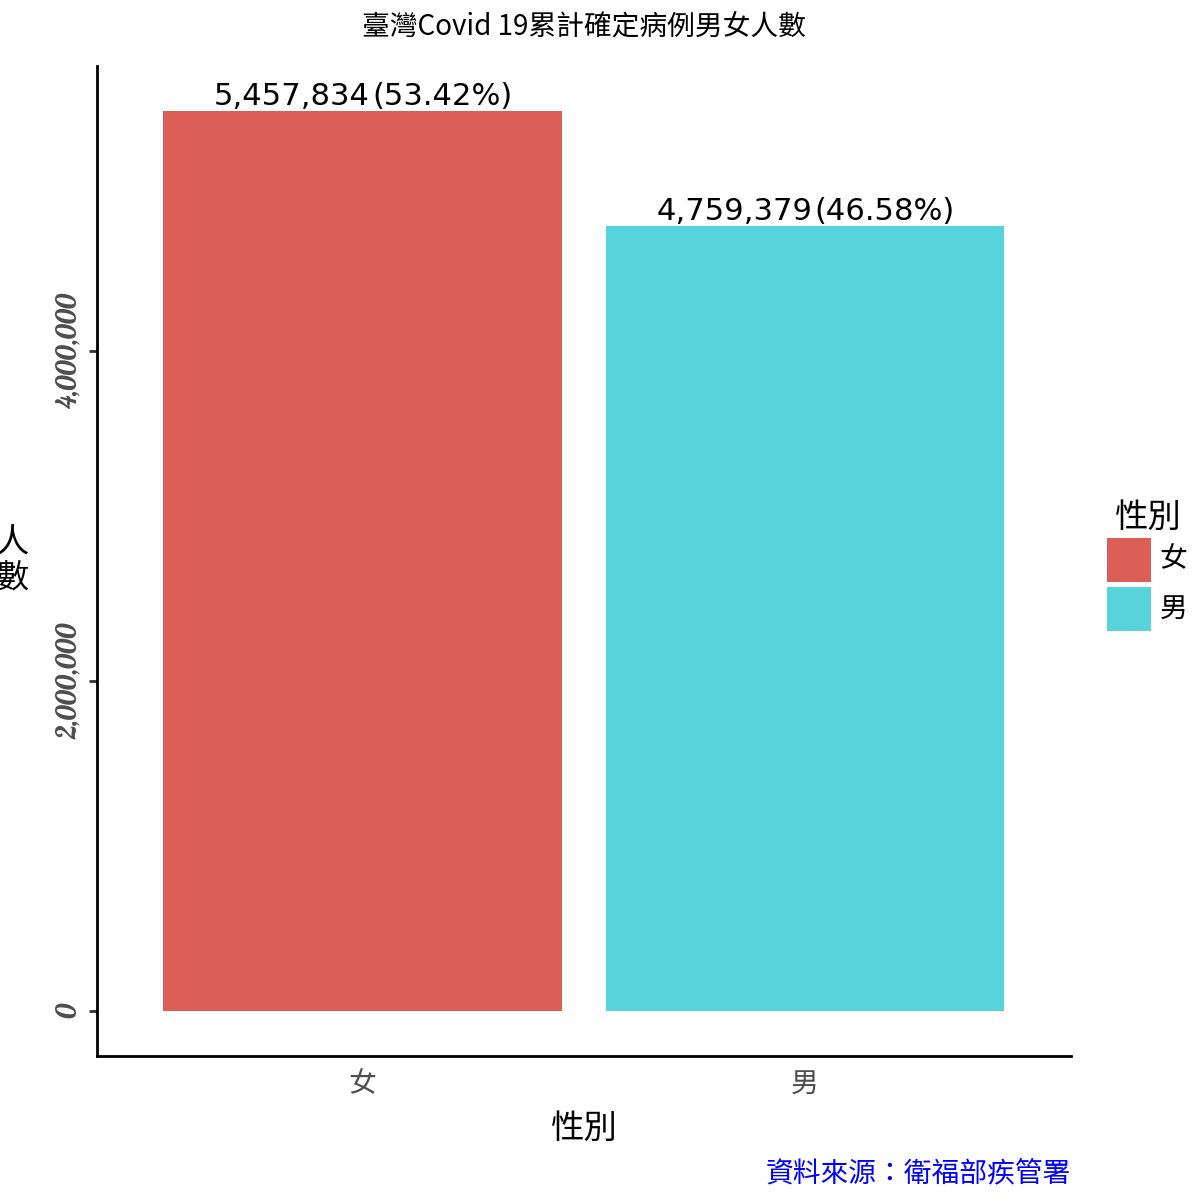

<Figure Size: (600 x 600)>

In [ ]:
ggplot(data=gender_df, mapping=aes(x='性別', y ='確定病例數' ,fill='性別')) +\
  geom_bar(stat = 'identity') +\
  scale_y_continuous(labels = comma_format()) +\
  labs(title='臺灣Covid 19累計確定病例男女人數',
       x='性別',
       y='人\n數',
       caption='資料來源：衛福部疾管署') +\
  geom_text(
     aes(label='comma_format()(確定病例數)'),
         nudge_x=-0.16, nudge_y=0.125,
         va='bottom') +\
  geom_text(
      aes(label='比例'),
          nudge_x=0.18, nudge_y=0.05,
          va='bottom', format_string='({:.2f}%)') +\
  theme_classic() +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        plot_subtitle=element_text(fontproperties=lobster,
                                weight='bold', ha='center', size=10, linespacing=1.5),  # 副標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  ha='center', size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=noto,
                                 size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 rotation=90, size=10), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
        legend_title=element_text(fontproperties=noto, size=12), # 圖例標題
        legend_title_align='center',
        legend_text=element_text(fontproperties=noto, size=10), # 圖例文字
        figure_size=(6,6))

### 年齡的分向長條圖

In [ ]:
age = (covid_df[['年齡層','確定病例數']]
         .groupby('年齡層', observed=False)
         .sum()
         .reset_index()
         .rename(columns={'確定病例數':'人數'}))
age

,年齡層,人數
0,0-4,434896
1,5-9,583988
2,10-14,534022
3,15-19,557770
4,20-24,744830
5,25-29,920559
6,30-34,895316
7,35-39,908170
8,40-44,960997
9,45-49,753973


計算標準化z值  
* z = (x - mean(x))/ std(x)  

依據z值將資料分為兩類，並以此進行比較

In [ ]:
age_df = (age
            .assign(covid_z=lambda x: round((x.人數 - np.mean(x.人數))/np.std(x.人數), 2))
            .assign(type=lambda x: np.where(x.covid_z < 0, 'below', 'above'))
         )
age_df.head()

,年齡層,人數,covid_z,type
0,0-4,434896,-1.41,below
1,5-9,583988,-0.56,below
2,10-14,534022,-0.84,below
3,15-19,557770,-0.71,below
4,20-24,744830,0.36,above


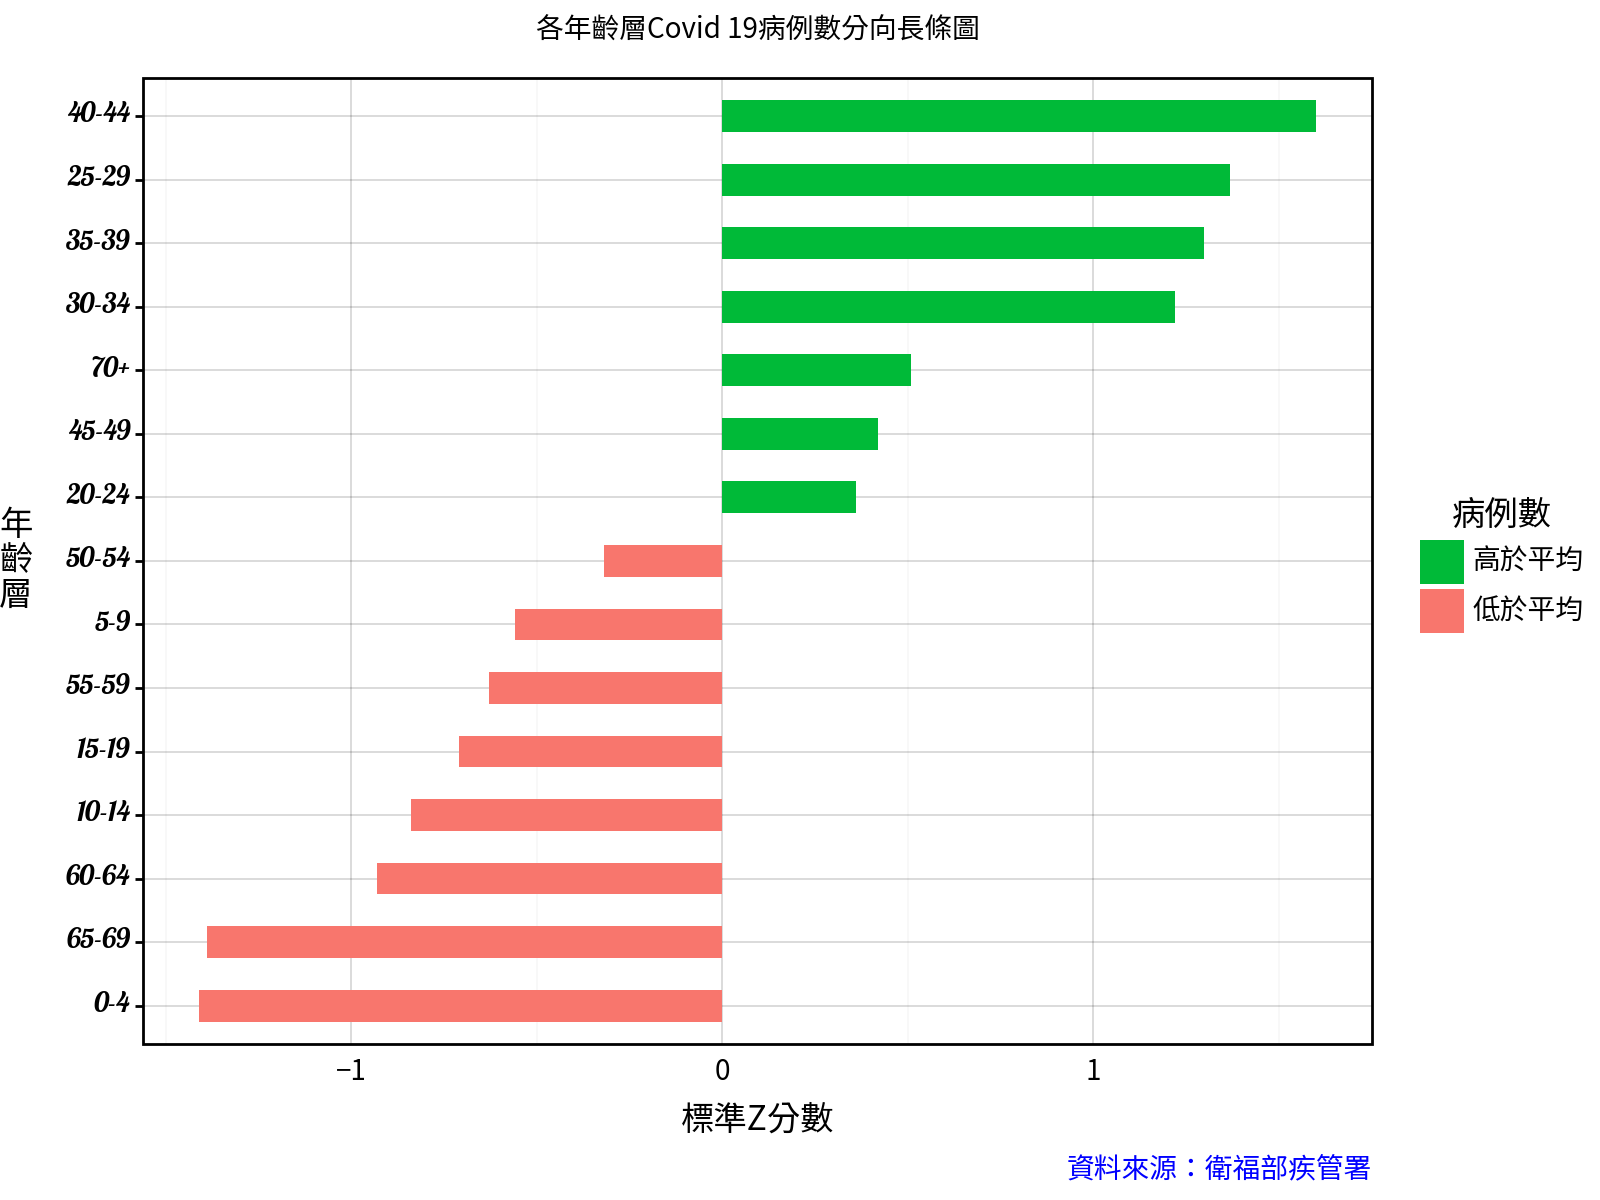

<Figure Size: (800 x 600)>

In [ ]:
ggplot(age_df, aes(x='reorder(年齡層, covid_z)', y='covid_z')) +\
  geom_bar(stat='identity', mapping=aes(fill='type'), width=0.5) +\
  scale_fill_manual(name='病例數',
                    labels = ['高於平均', '低於平均'],
                    values = {'above':'#00ba38', 'below':'#f8766d'}) +\
  coord_flip() +\
  labs(title= '各年齡層Covid 19病例數分向長條圖', y = '標準Z分數', x = '年\n齡\n層',
       caption='資料來源：衛福部疾管署') +\
  theme_linedraw() +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        plot_subtitle=element_text(fontproperties=lobster,
                                weight='bold', ha='center', size=10, linespacing=1.5),  # 副標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  ha='center', size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=noto,
                                 size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 size=10), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
        legend_title=element_text(fontproperties=noto, size=12), # 圖例標題
        legend_title_align='center',
        legend_text=element_text(fontproperties=noto, size=10), # 圖例文字
        figure_size=(8,6))

### 確定病例數在年齡與性別的交互作用折線圖

In [ ]:
covid_test = (covid_df[['年齡層','性別','確定病例數']]
                    .groupby(['年齡層','性別'],observed=False)
                    .agg('sum')
                    .reset_index())
covid_test

,年齡層,性別,確定病例數
0,0-4,女,207415
1,0-4,男,227481
2,5-9,女,277694
3,5-9,男,306294
4,10-14,女,250135
5,10-14,男,283887
6,15-19,女,266858
7,15-19,男,290912
8,20-24,女,374914
9,20-24,男,369916


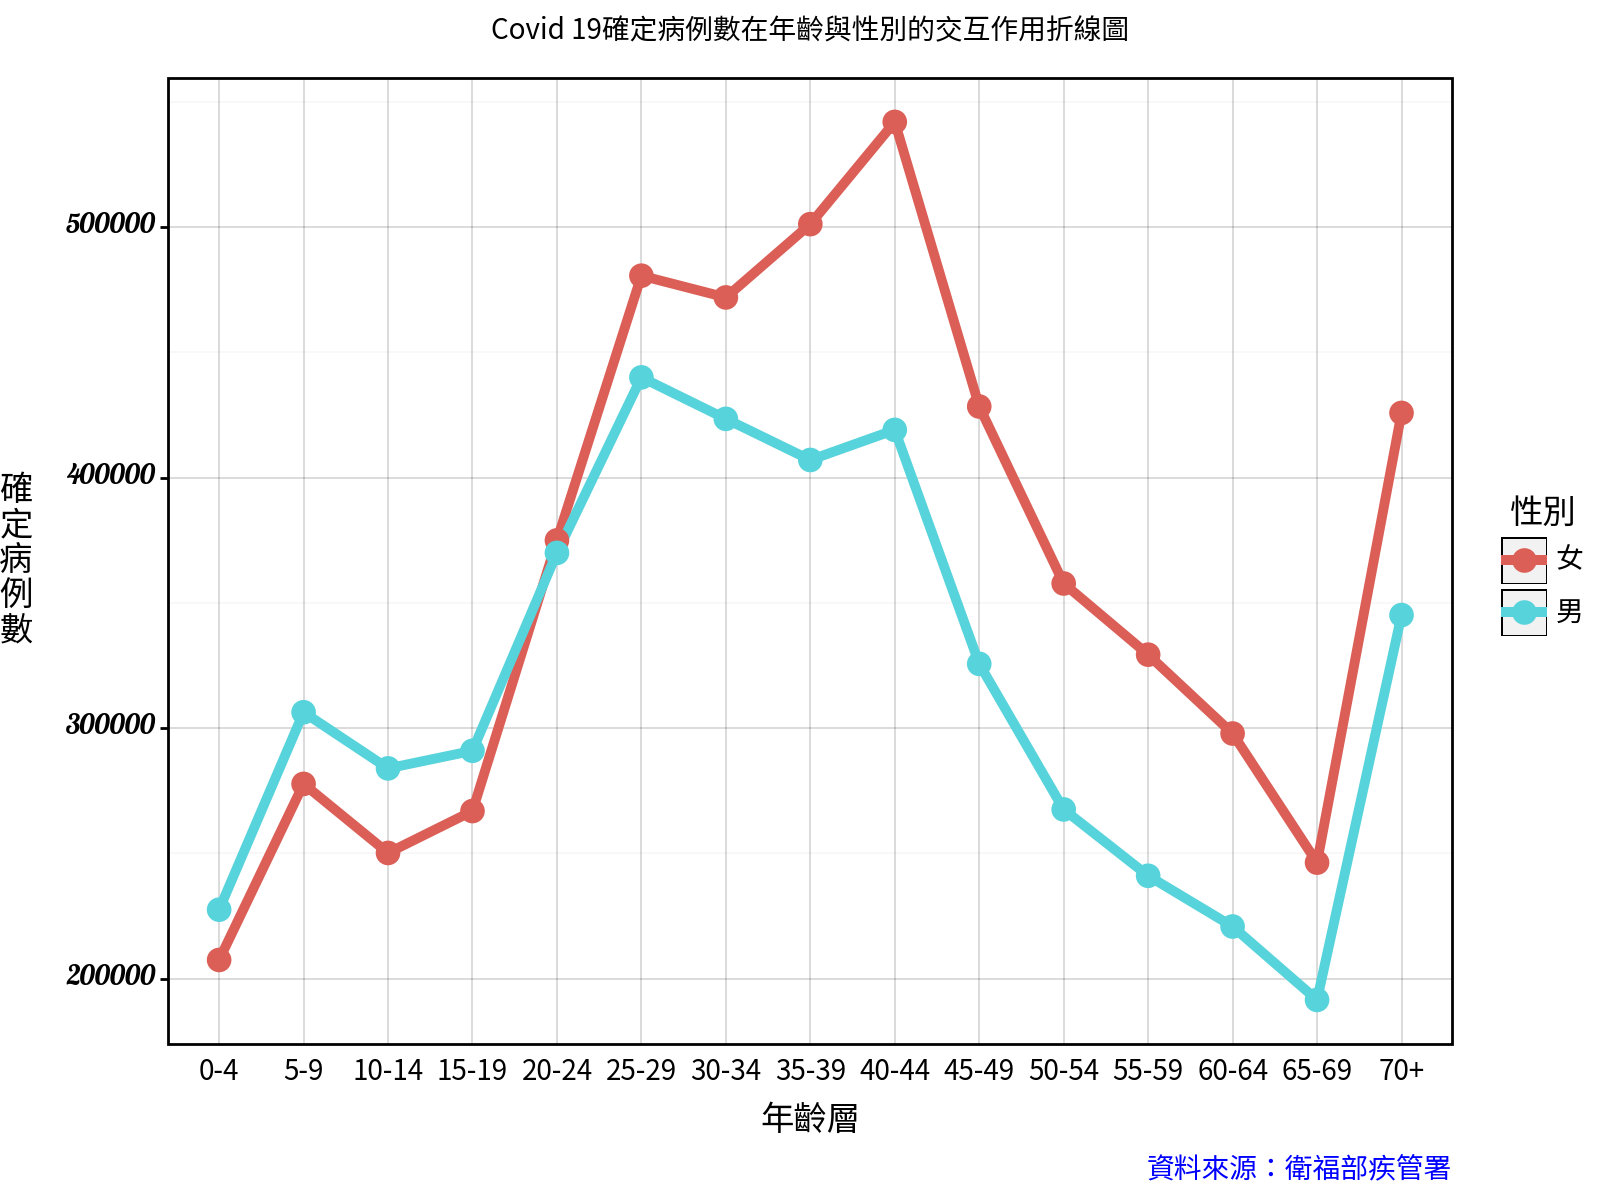

<Figure Size: (800 x 600)>

In [ ]:
ggplot(covid_test, aes(x='年齡層',y='確定病例數',group='性別')) +\
  geom_line(aes(color='性別'),size=2) +\
  geom_point(aes(color='性別'),size=4)+\
  labs(title='Covid 19確定病例數在年齡與性別的交互作用折線圖',
       x='年齡層',
       y='確\n定\n病\n例\n數',
       color='性別',
       caption='資料來源：衛福部疾管署') +\
  theme_linedraw() +\
  theme(text=element_text(fontproperties=noto),
        plot_title=element_text(fontproperties=noto,
                                weight='bold', ha='center', size=14),  # 標題格式
        plot_subtitle=element_text(fontproperties=lobster,
                                weight='bold', ha='center', size=10, linespacing=1.5),  # 副標題格式
        axis_title_x=element_text(fontproperties=noto, style='italic',
                                  ha='center', size=12), # x軸標題格式
        axis_title_y=element_text(fontproperties=noto, va='center',
                                  ha='center', size=12, rotation=0 , linespacing = 1), # y軸標題格式
        axis_text_x=element_text(fontproperties=noto,
                                 size=10, ha='center'), # x軸文字格式
        axis_text_y=element_text(fontproperties=lobster,
                                 size=10), # y軸文字格式
        axis_ticks_major_x=element_blank(),
        plot_caption=element_text(fontproperties=noto, size=10, color="blue"),
        legend_title=element_text(fontproperties=noto, size=12), # 圖例標題
        legend_title_align='center',
        legend_text=element_text(fontproperties=noto, size=10), # 圖例文字
        figure_size=(8,6))